# Training plots for TSP

In [6]:
from tensorboard.backend.event_processing import event_accumulator
from pprint import pp, pprint
from sys import argv
import matplotlib.pyplot as plt
import numpy as np
import glob

figsize = (15, 10)
dpi = 200

In [7]:
logs = glob.glob('mylogs/**/events.out.*', recursive=True)
eas = [event_accumulator.EventAccumulator(l) for l in logs]
names = [l.replace('\\','/').split('/')[-2] for l in logs]

for ea in eas:
    ea.Reload()

## Linear scale

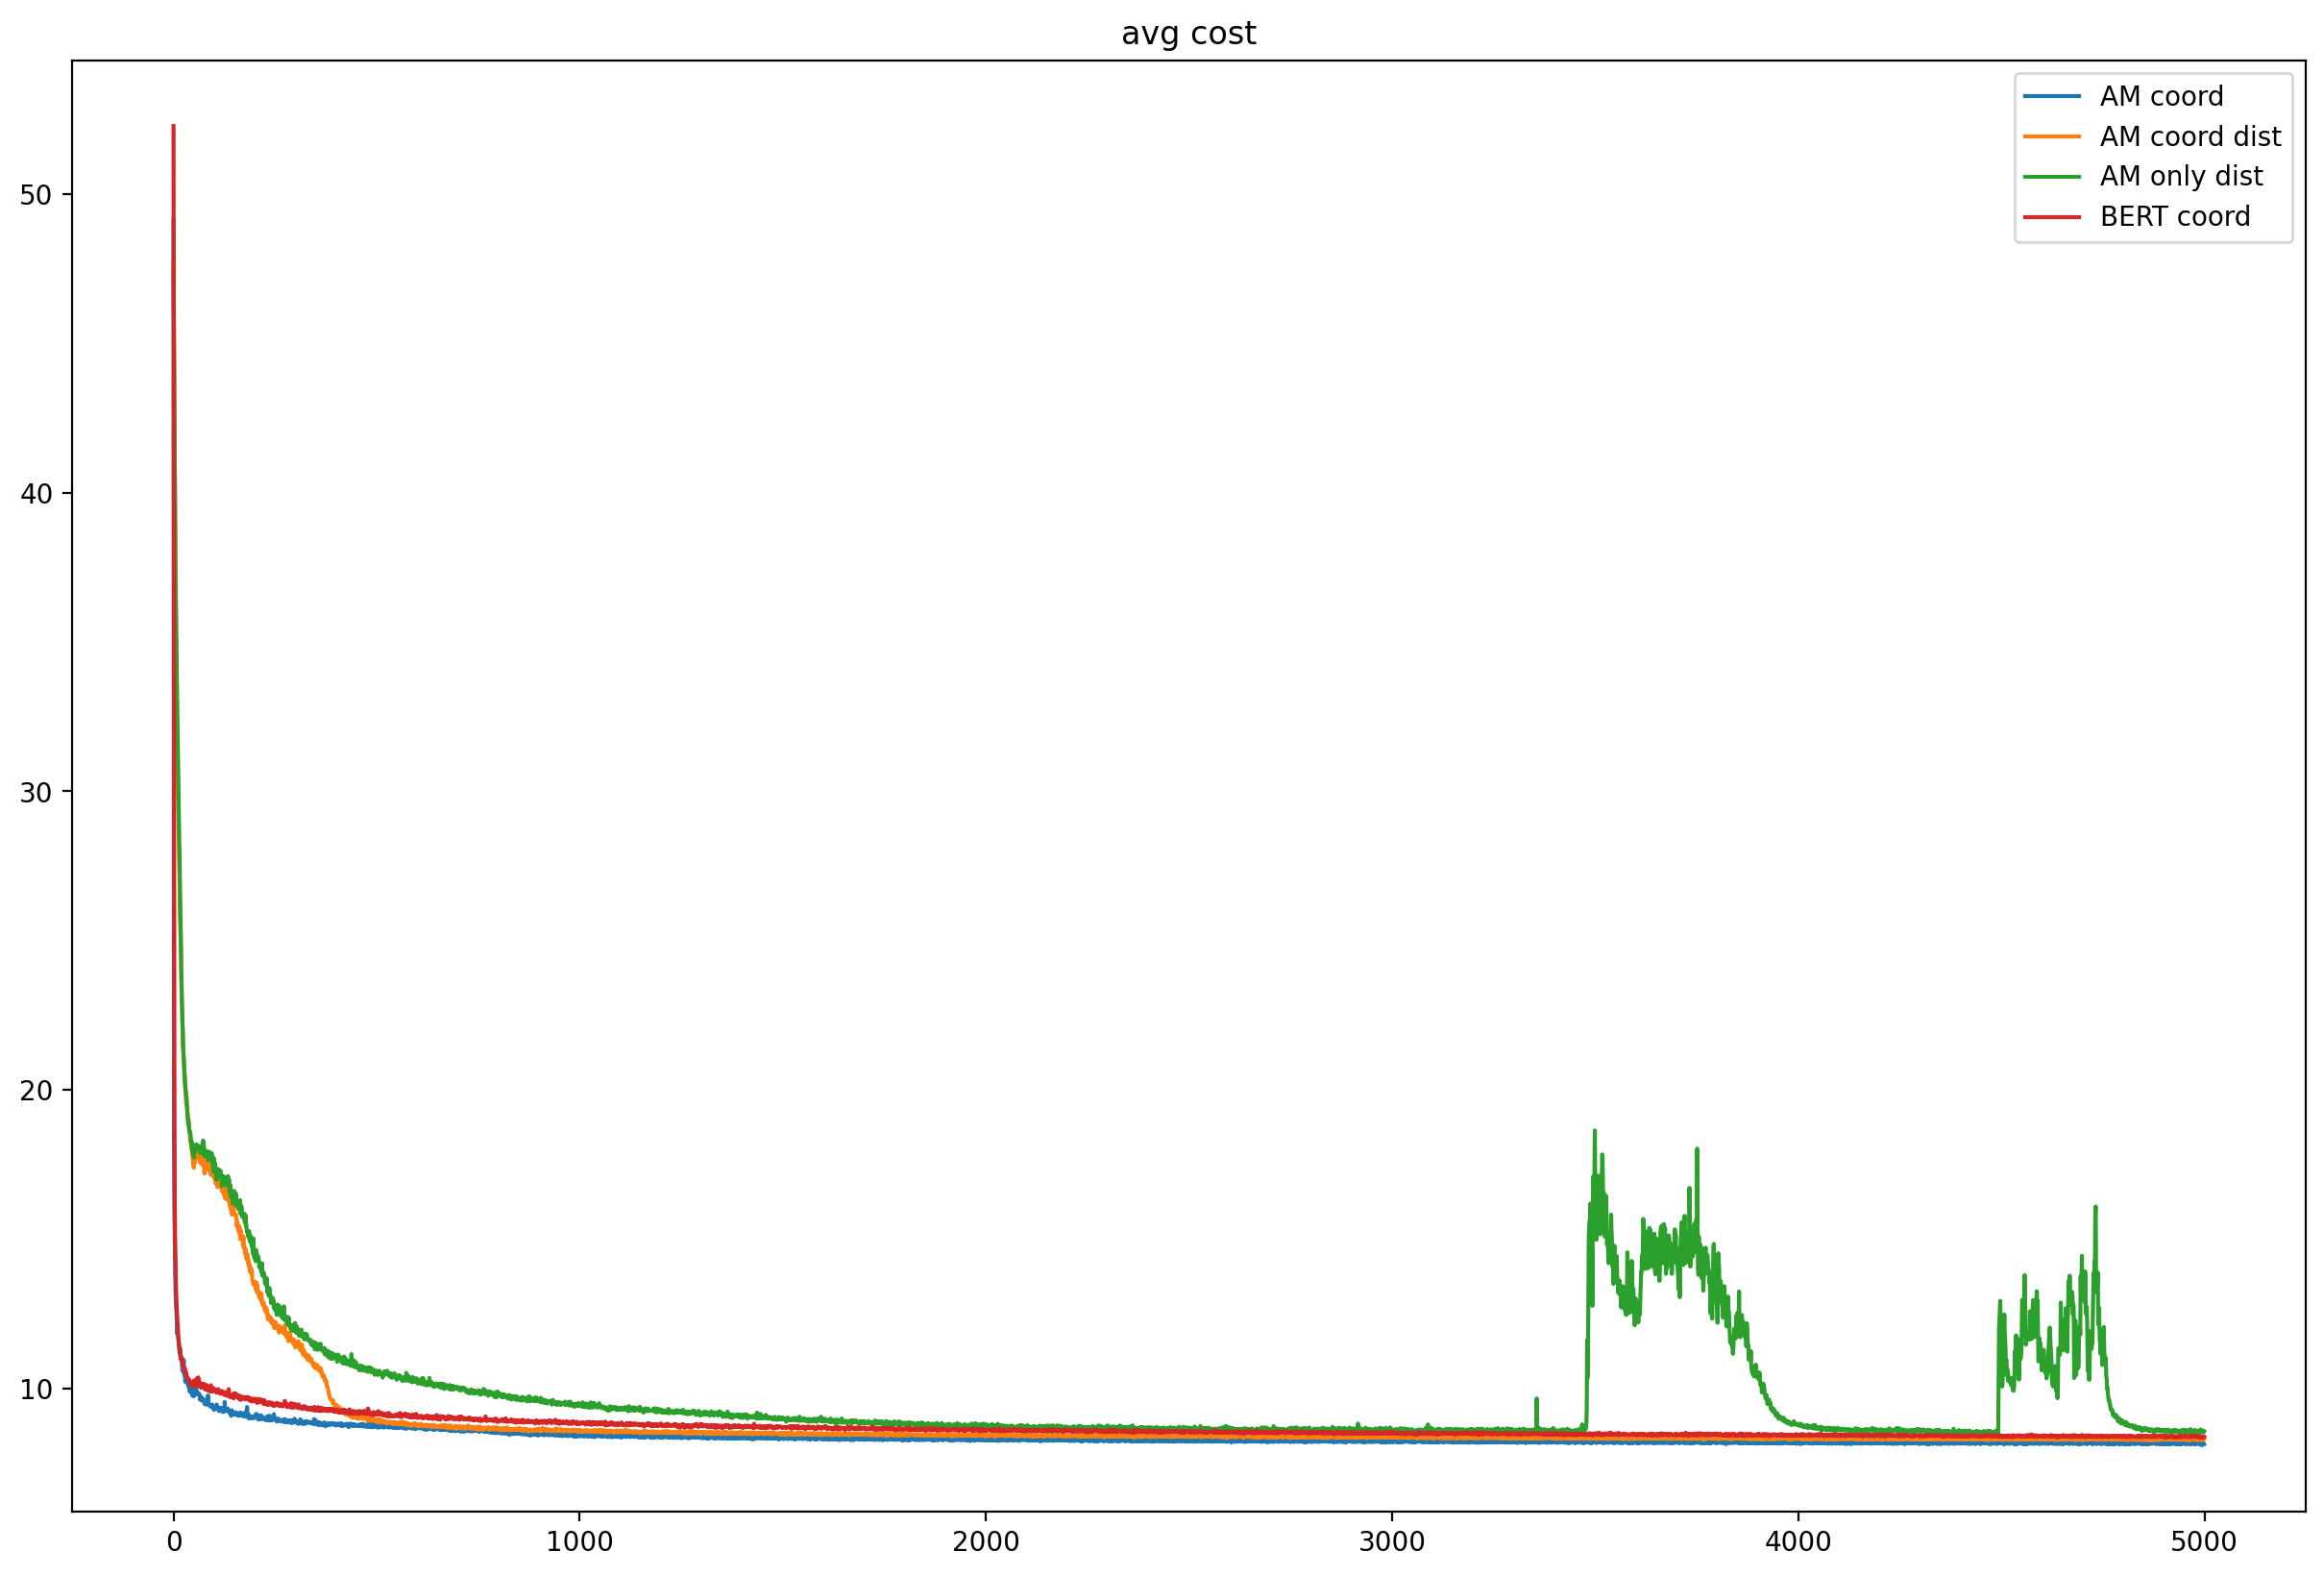

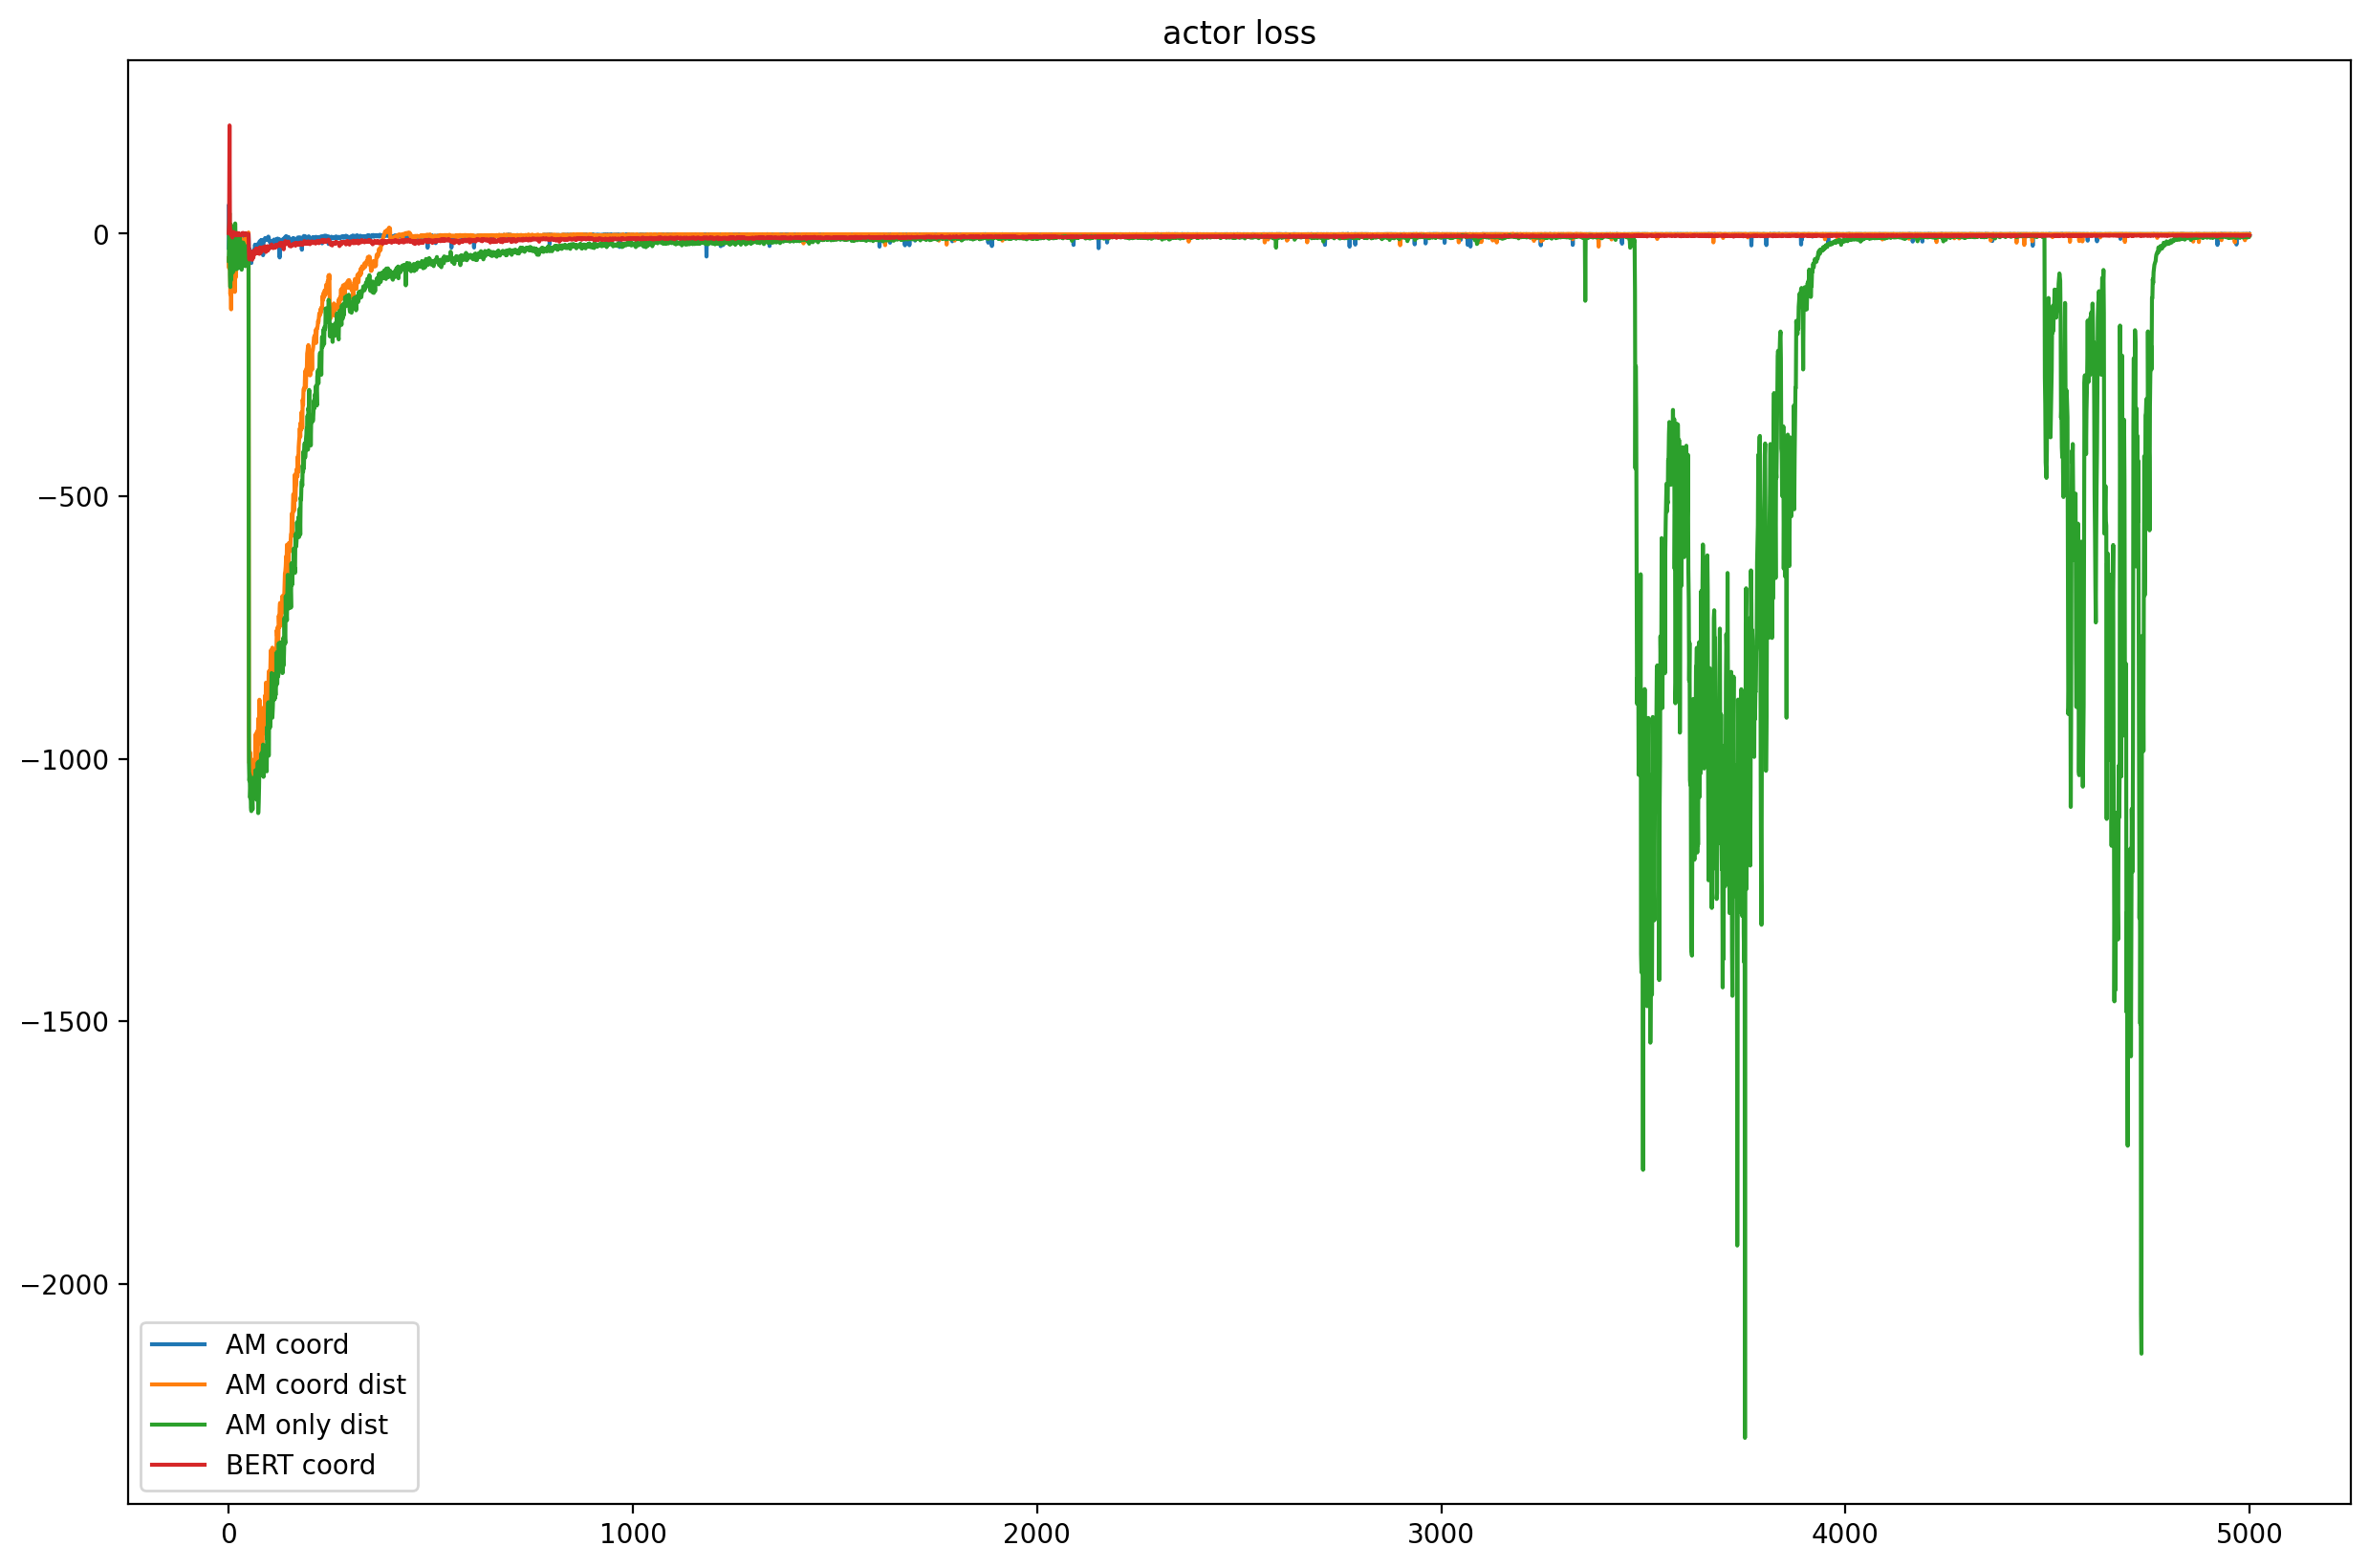

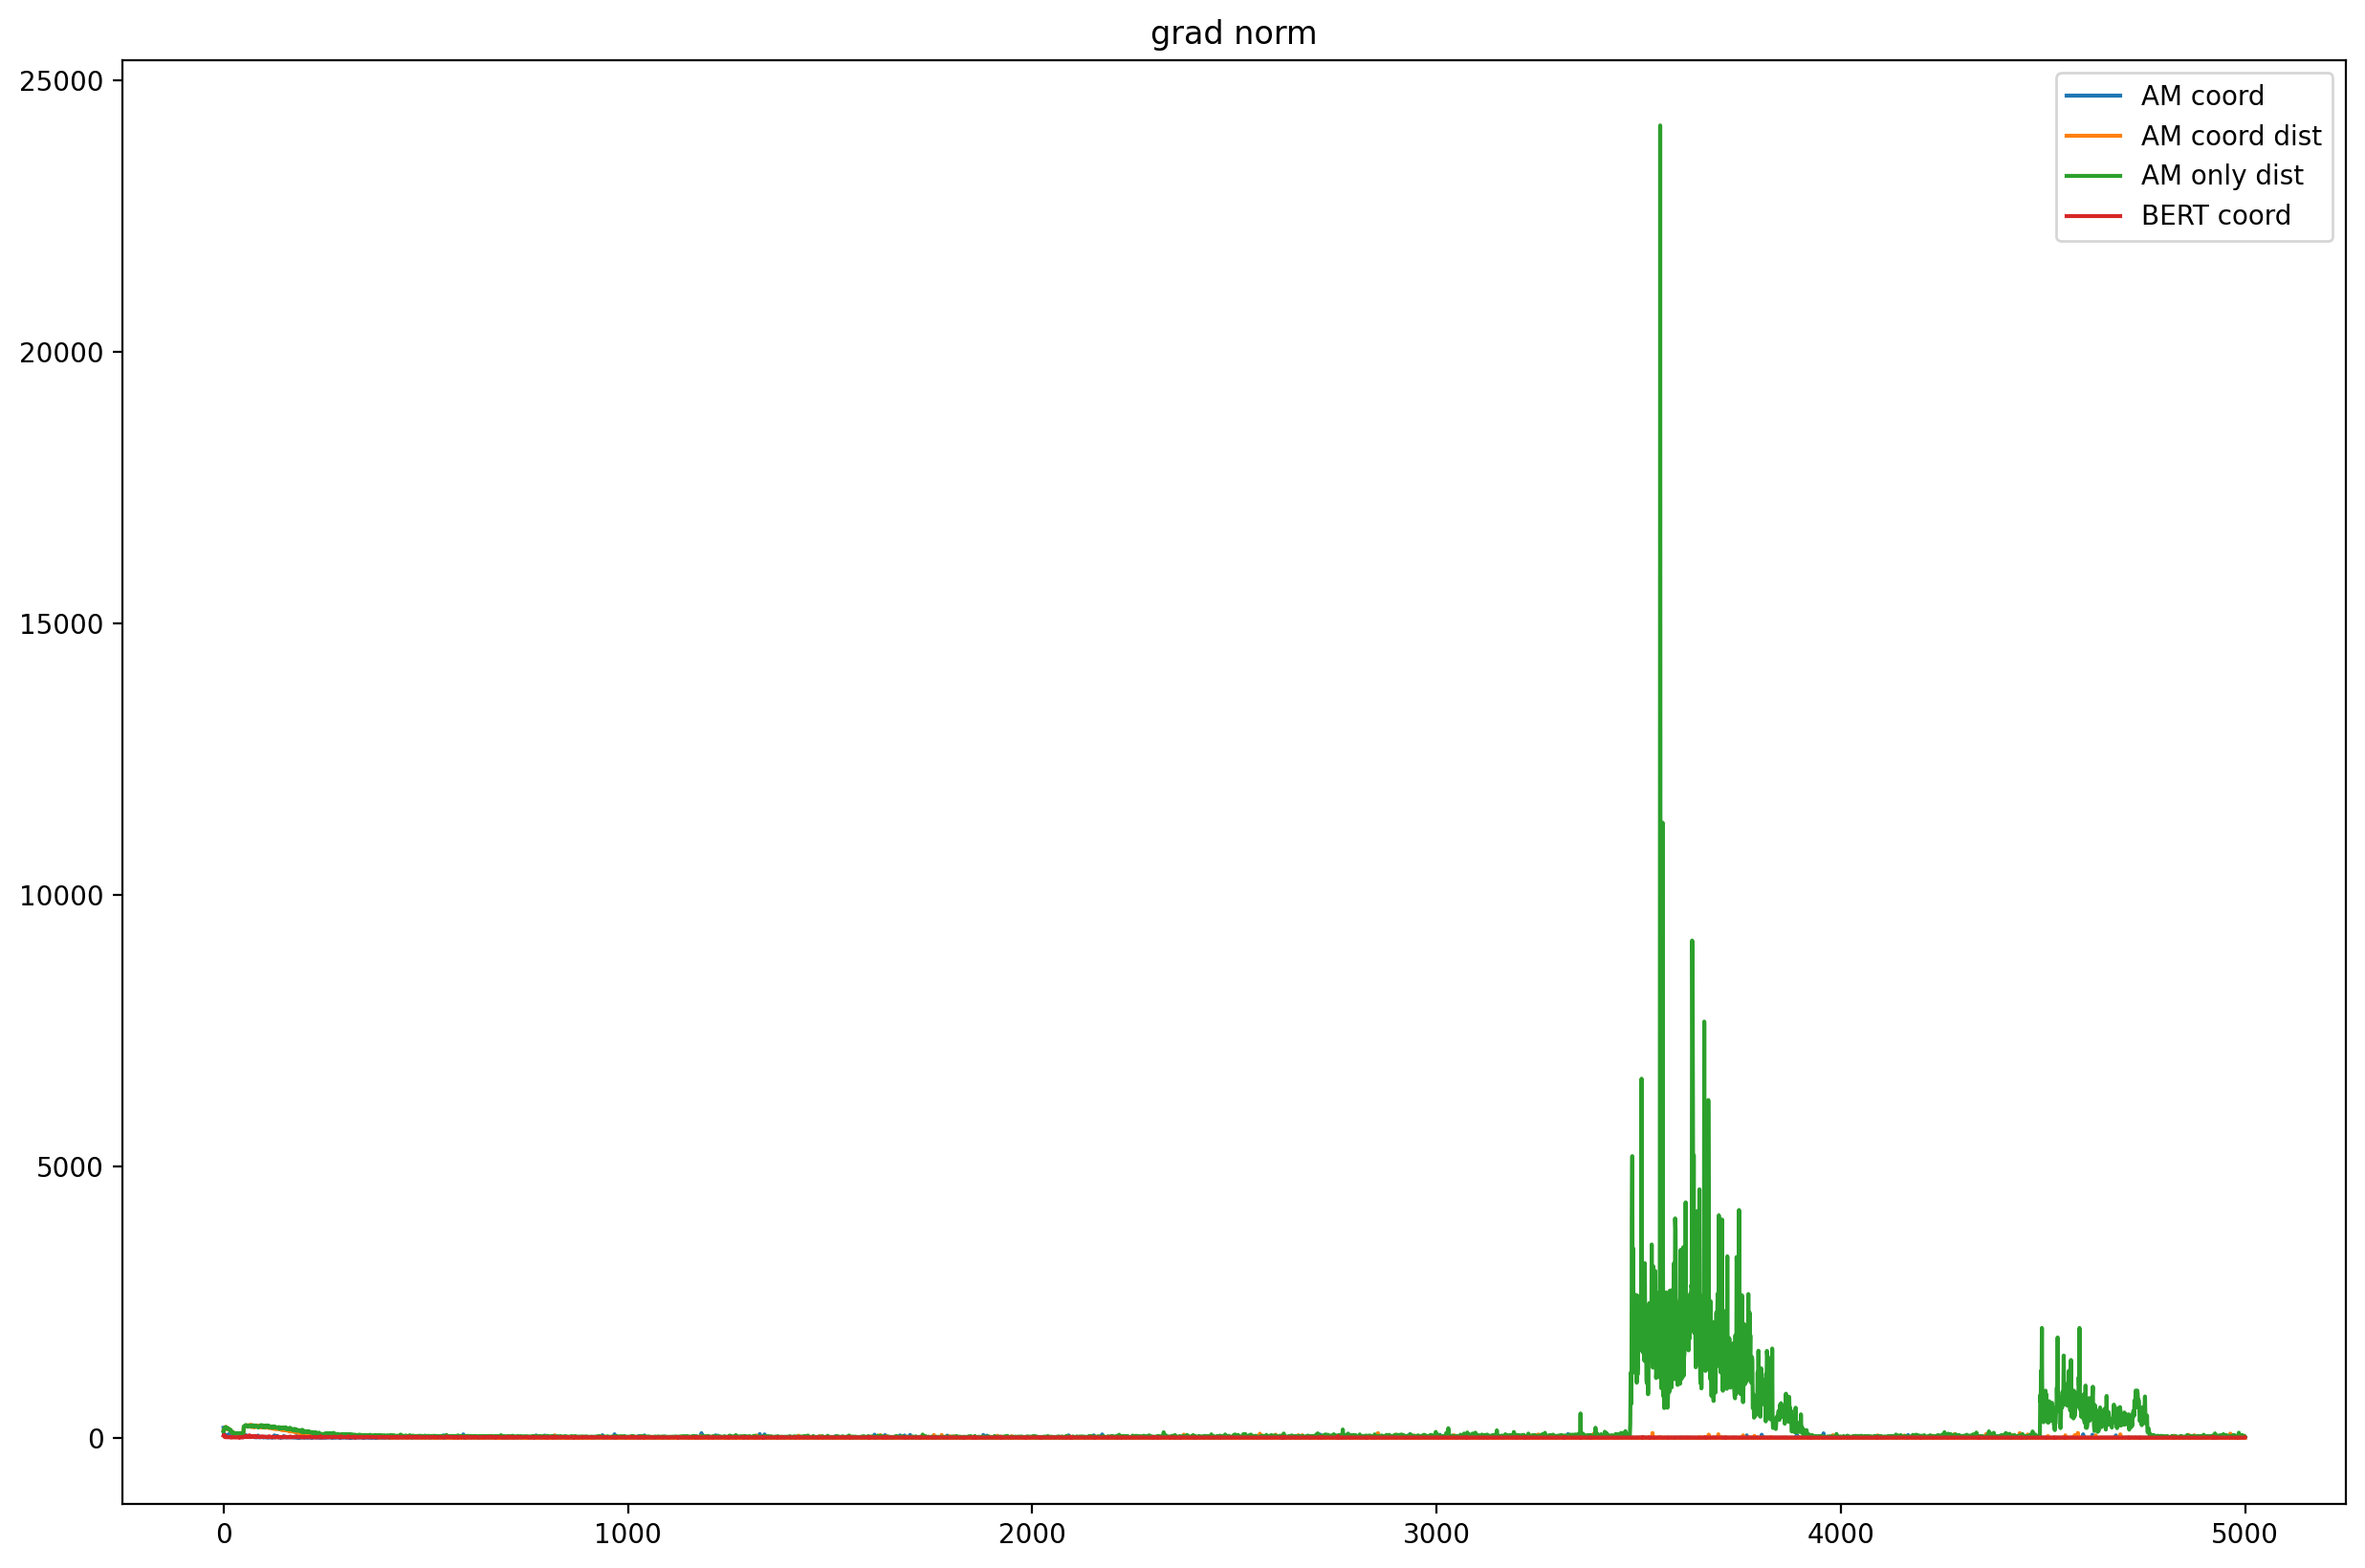

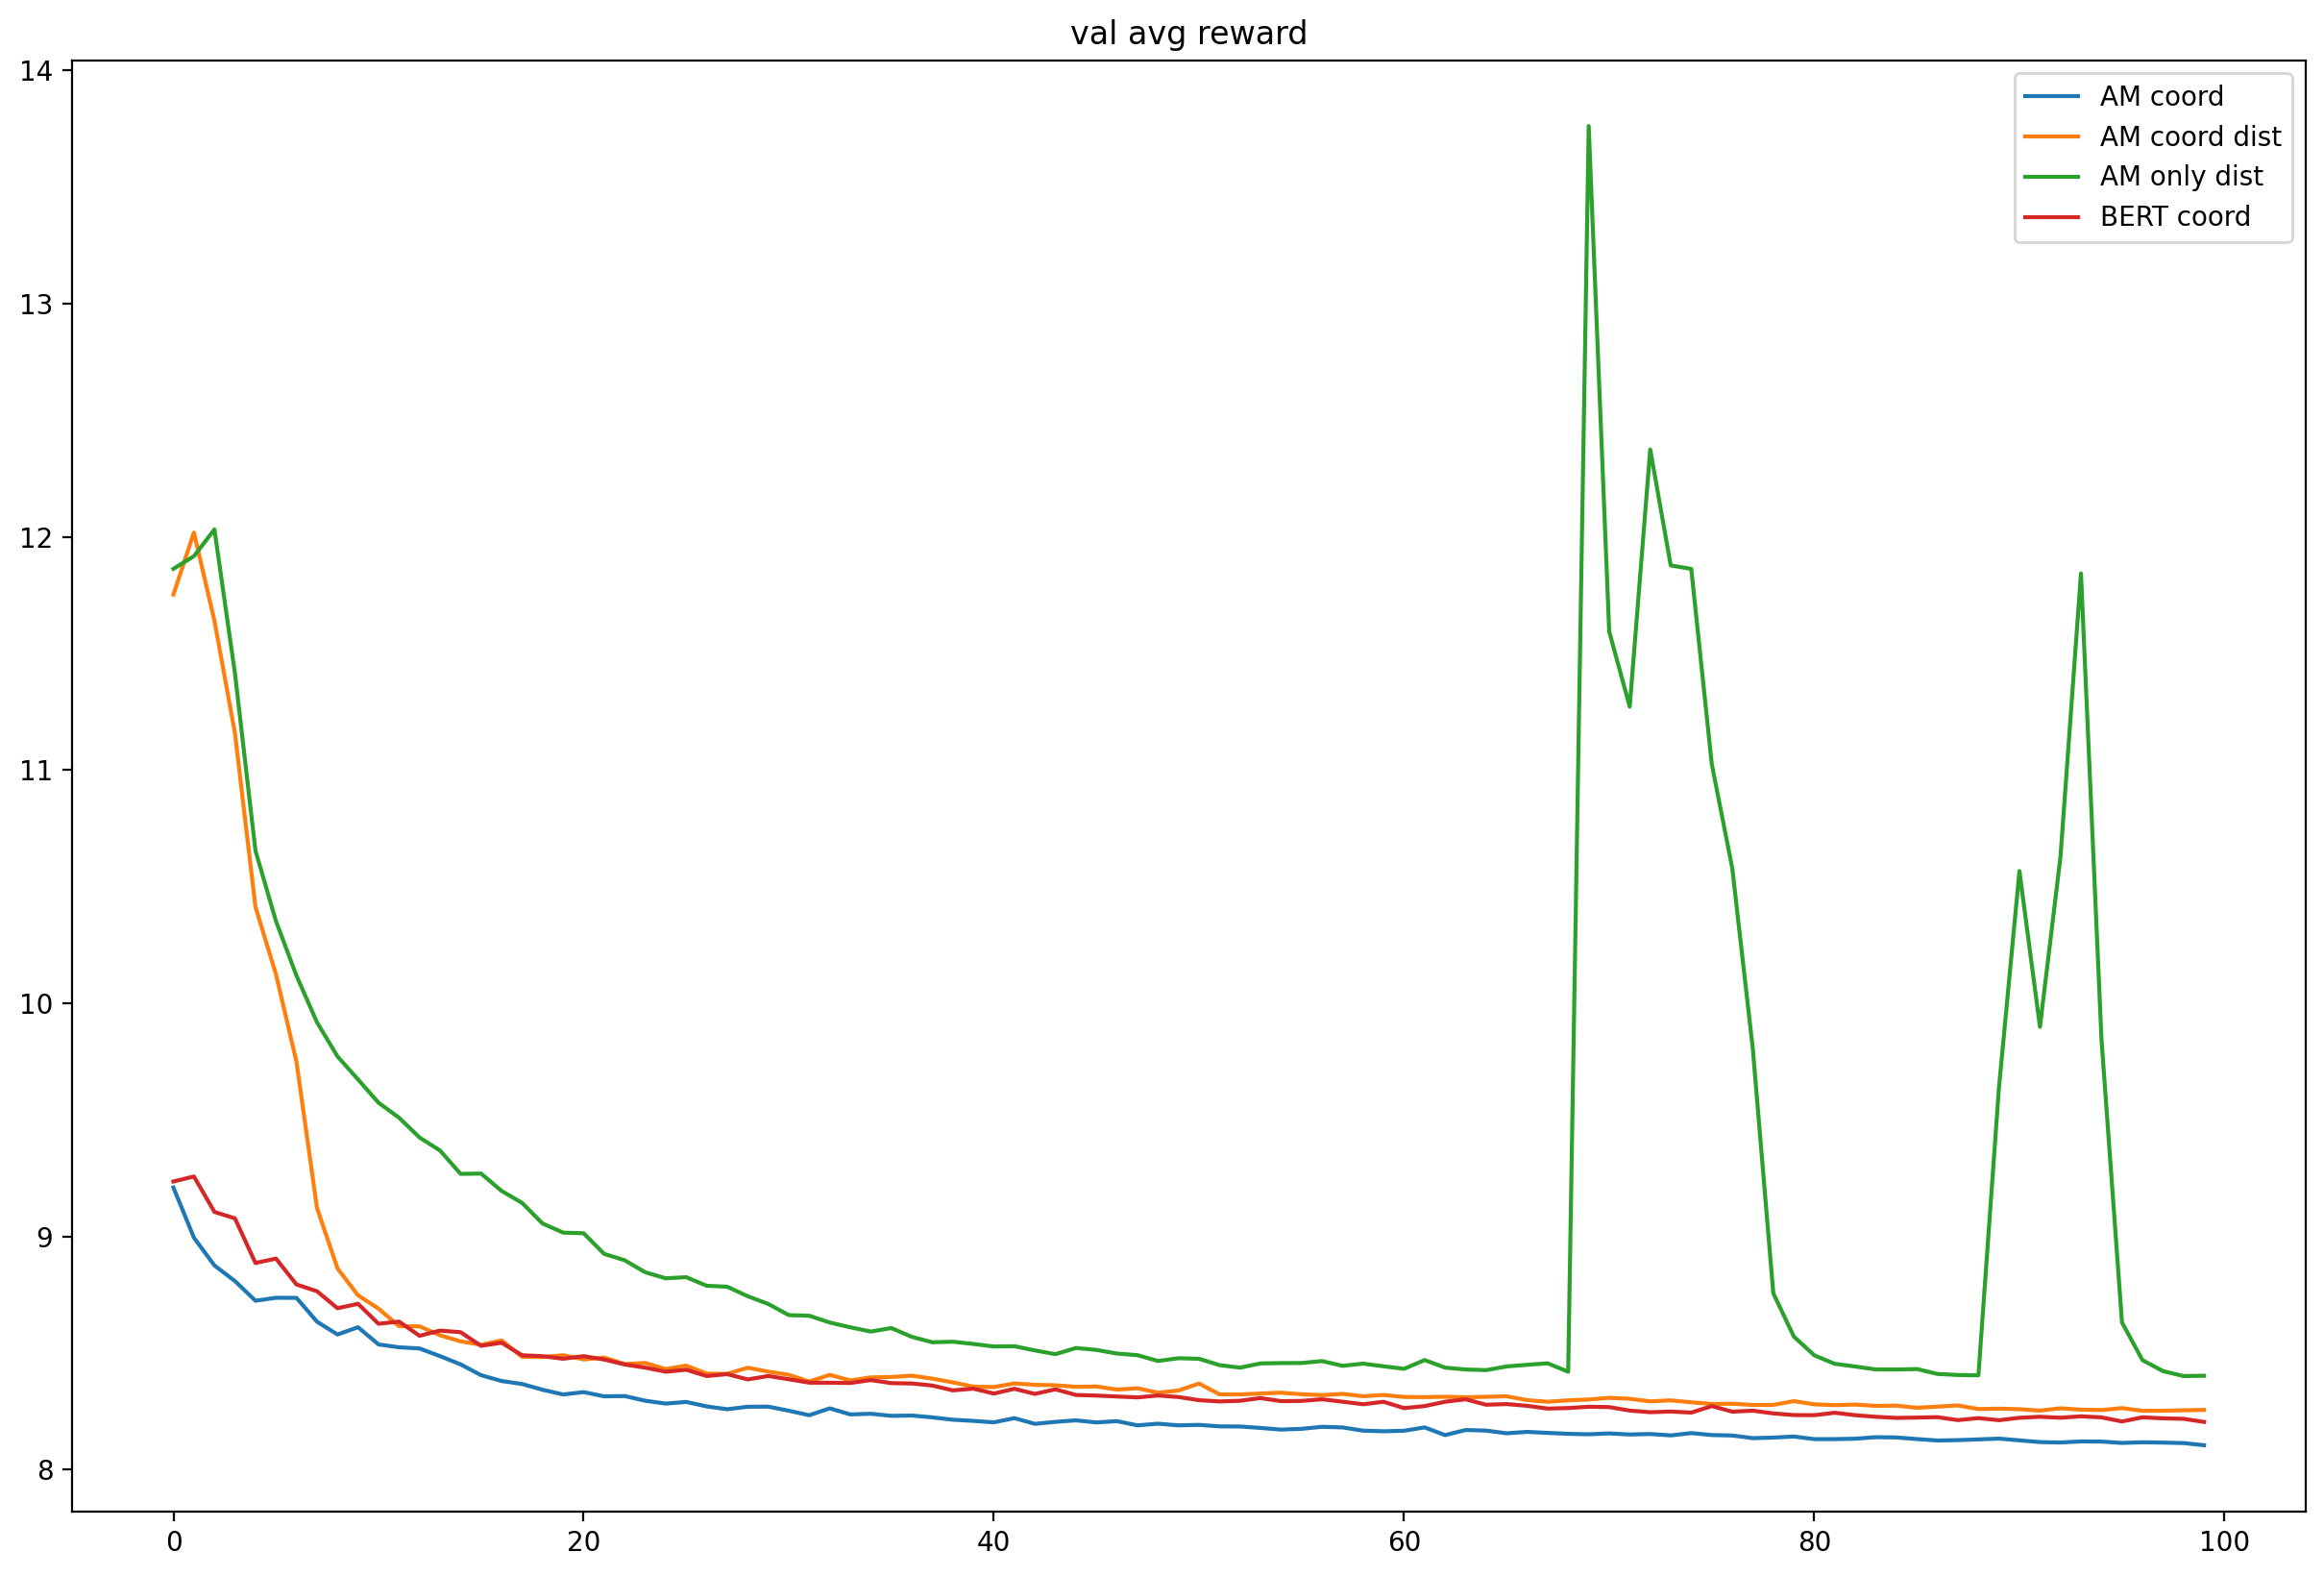

In [8]:
for serie_name in ['avg_cost', 'actor_loss', 'grad_norm', 'val_avg_reward']:

    plt.figure(figsize=figsize, dpi=dpi)

    for i, ea in enumerate(eas):    
        serie = [e.value for e in ea.Scalars(serie_name)]
        plt.plot(serie, label=names[i].replace('_', ' '))

    plt.legend()
    plt.title(serie_name.replace('_', ' '))
    plt.show()

## Linear scale (y limited $\mu \pm 3\delta$)

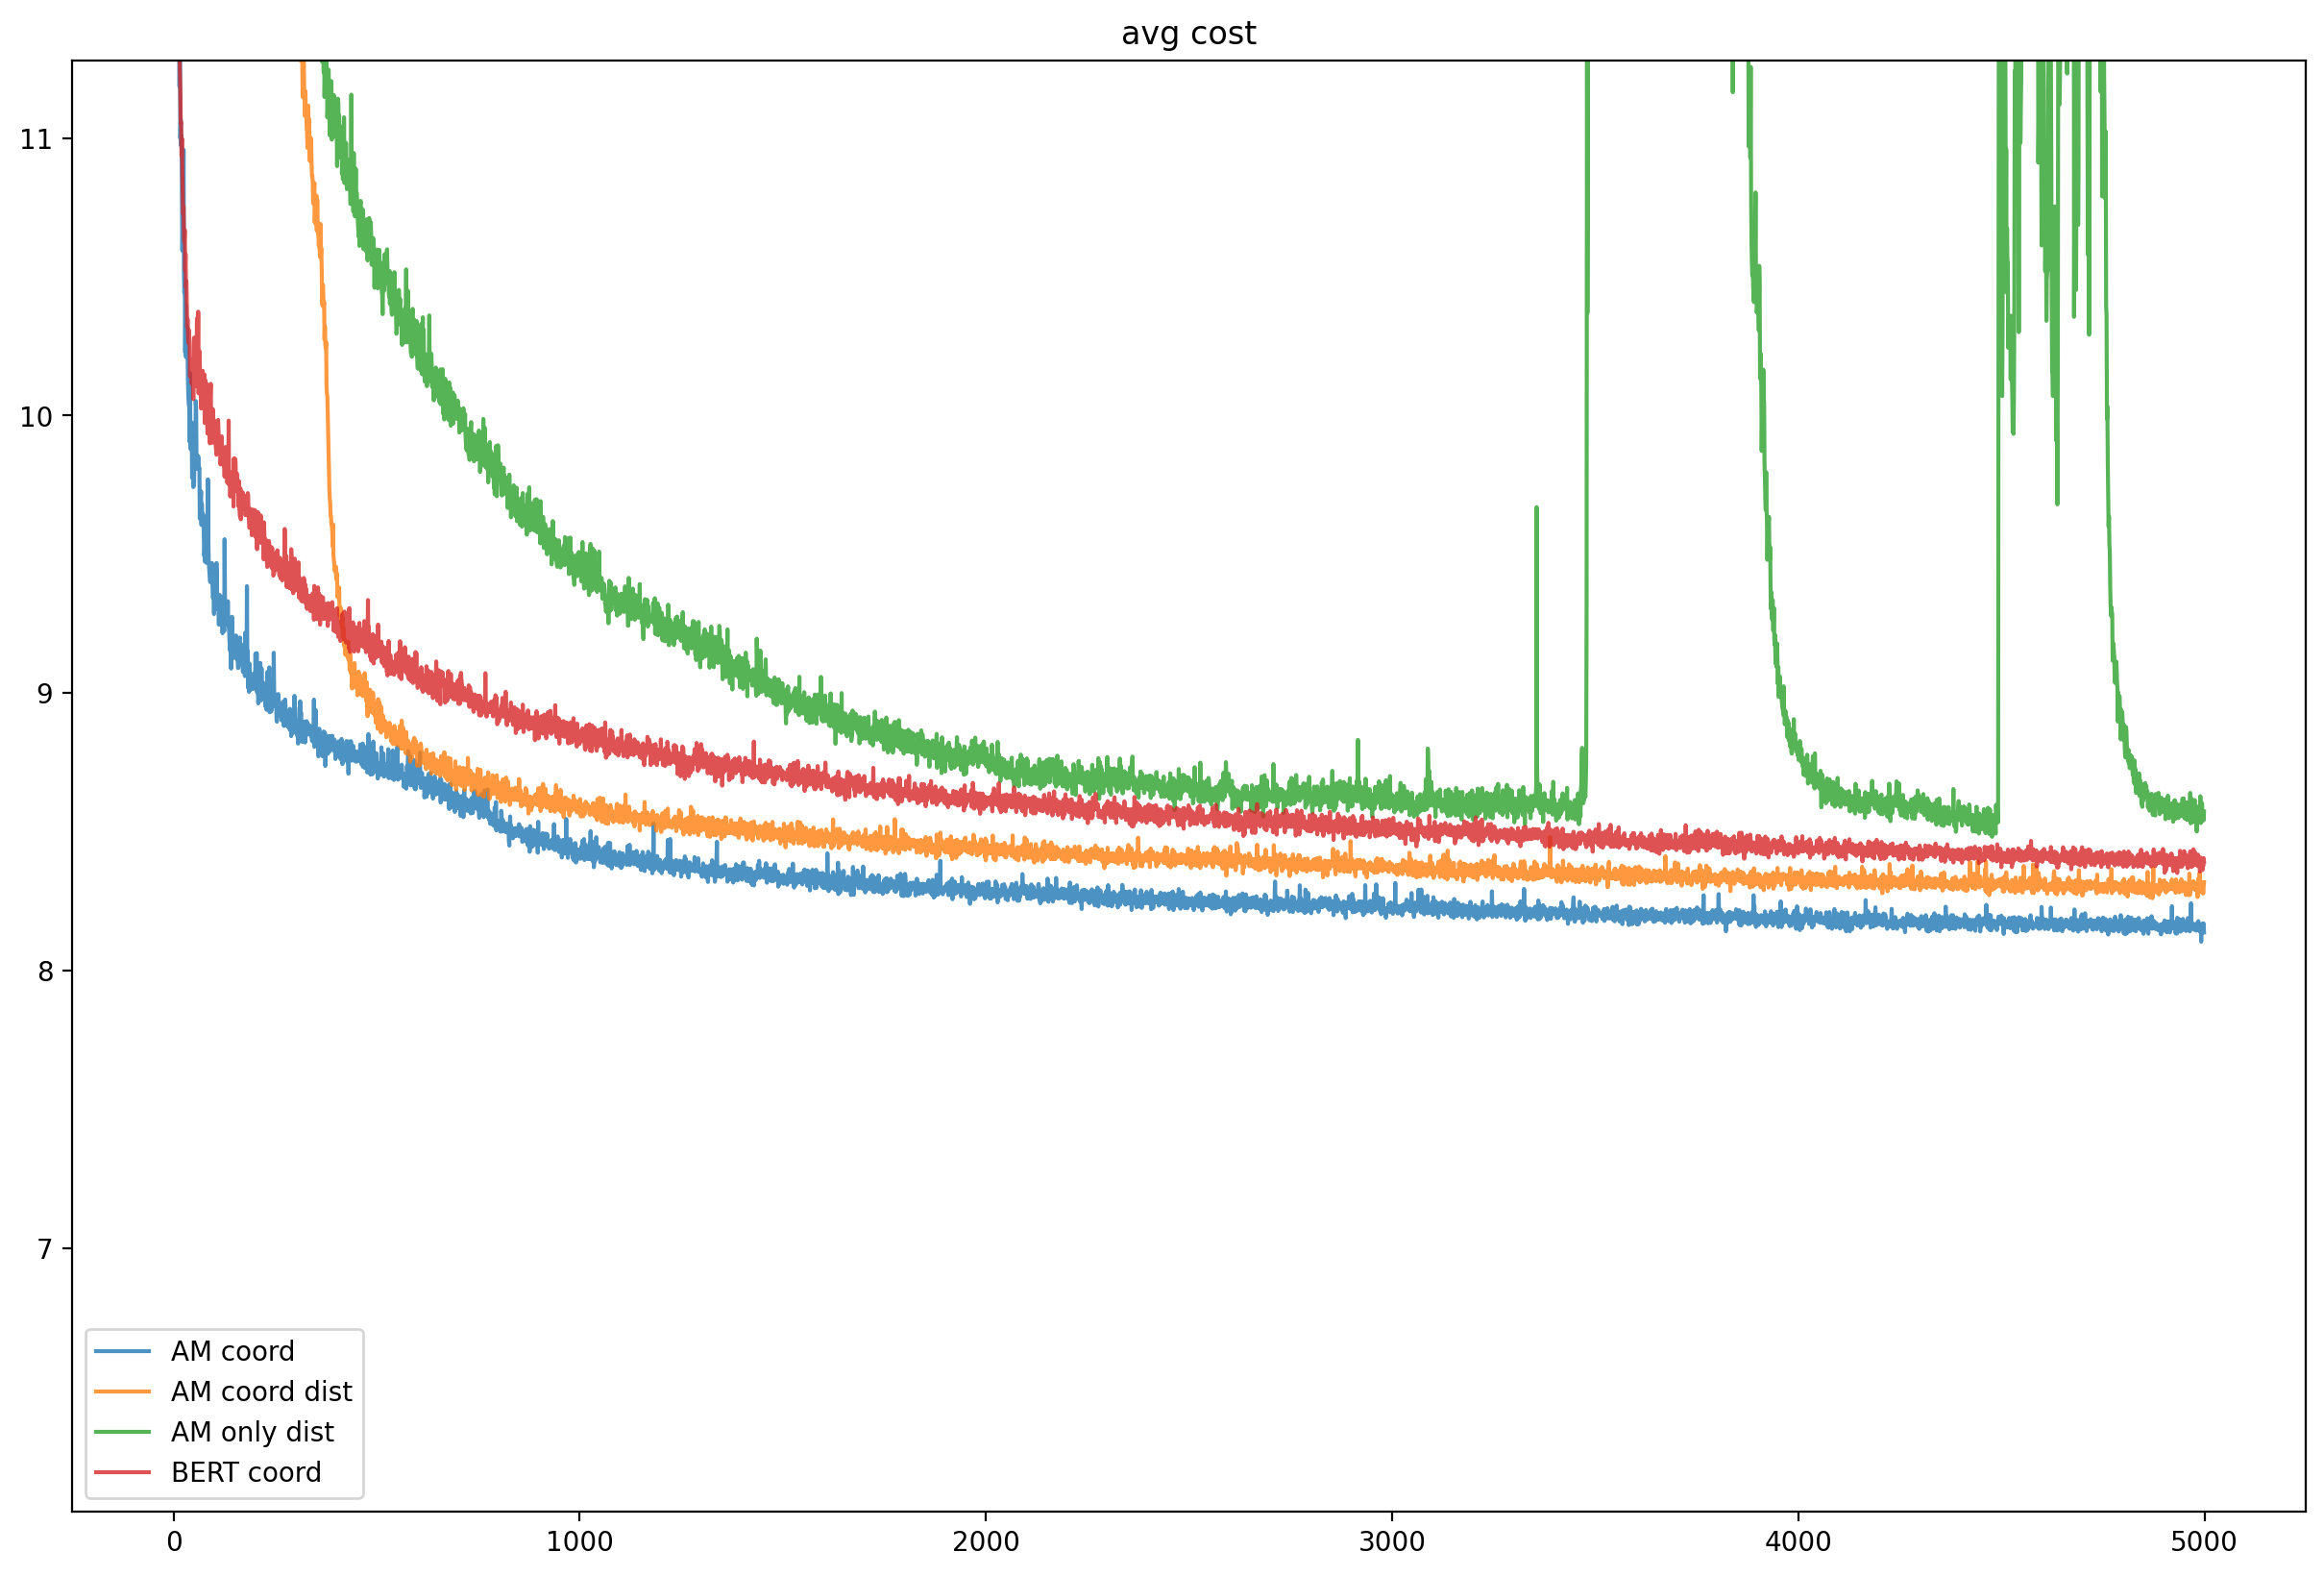

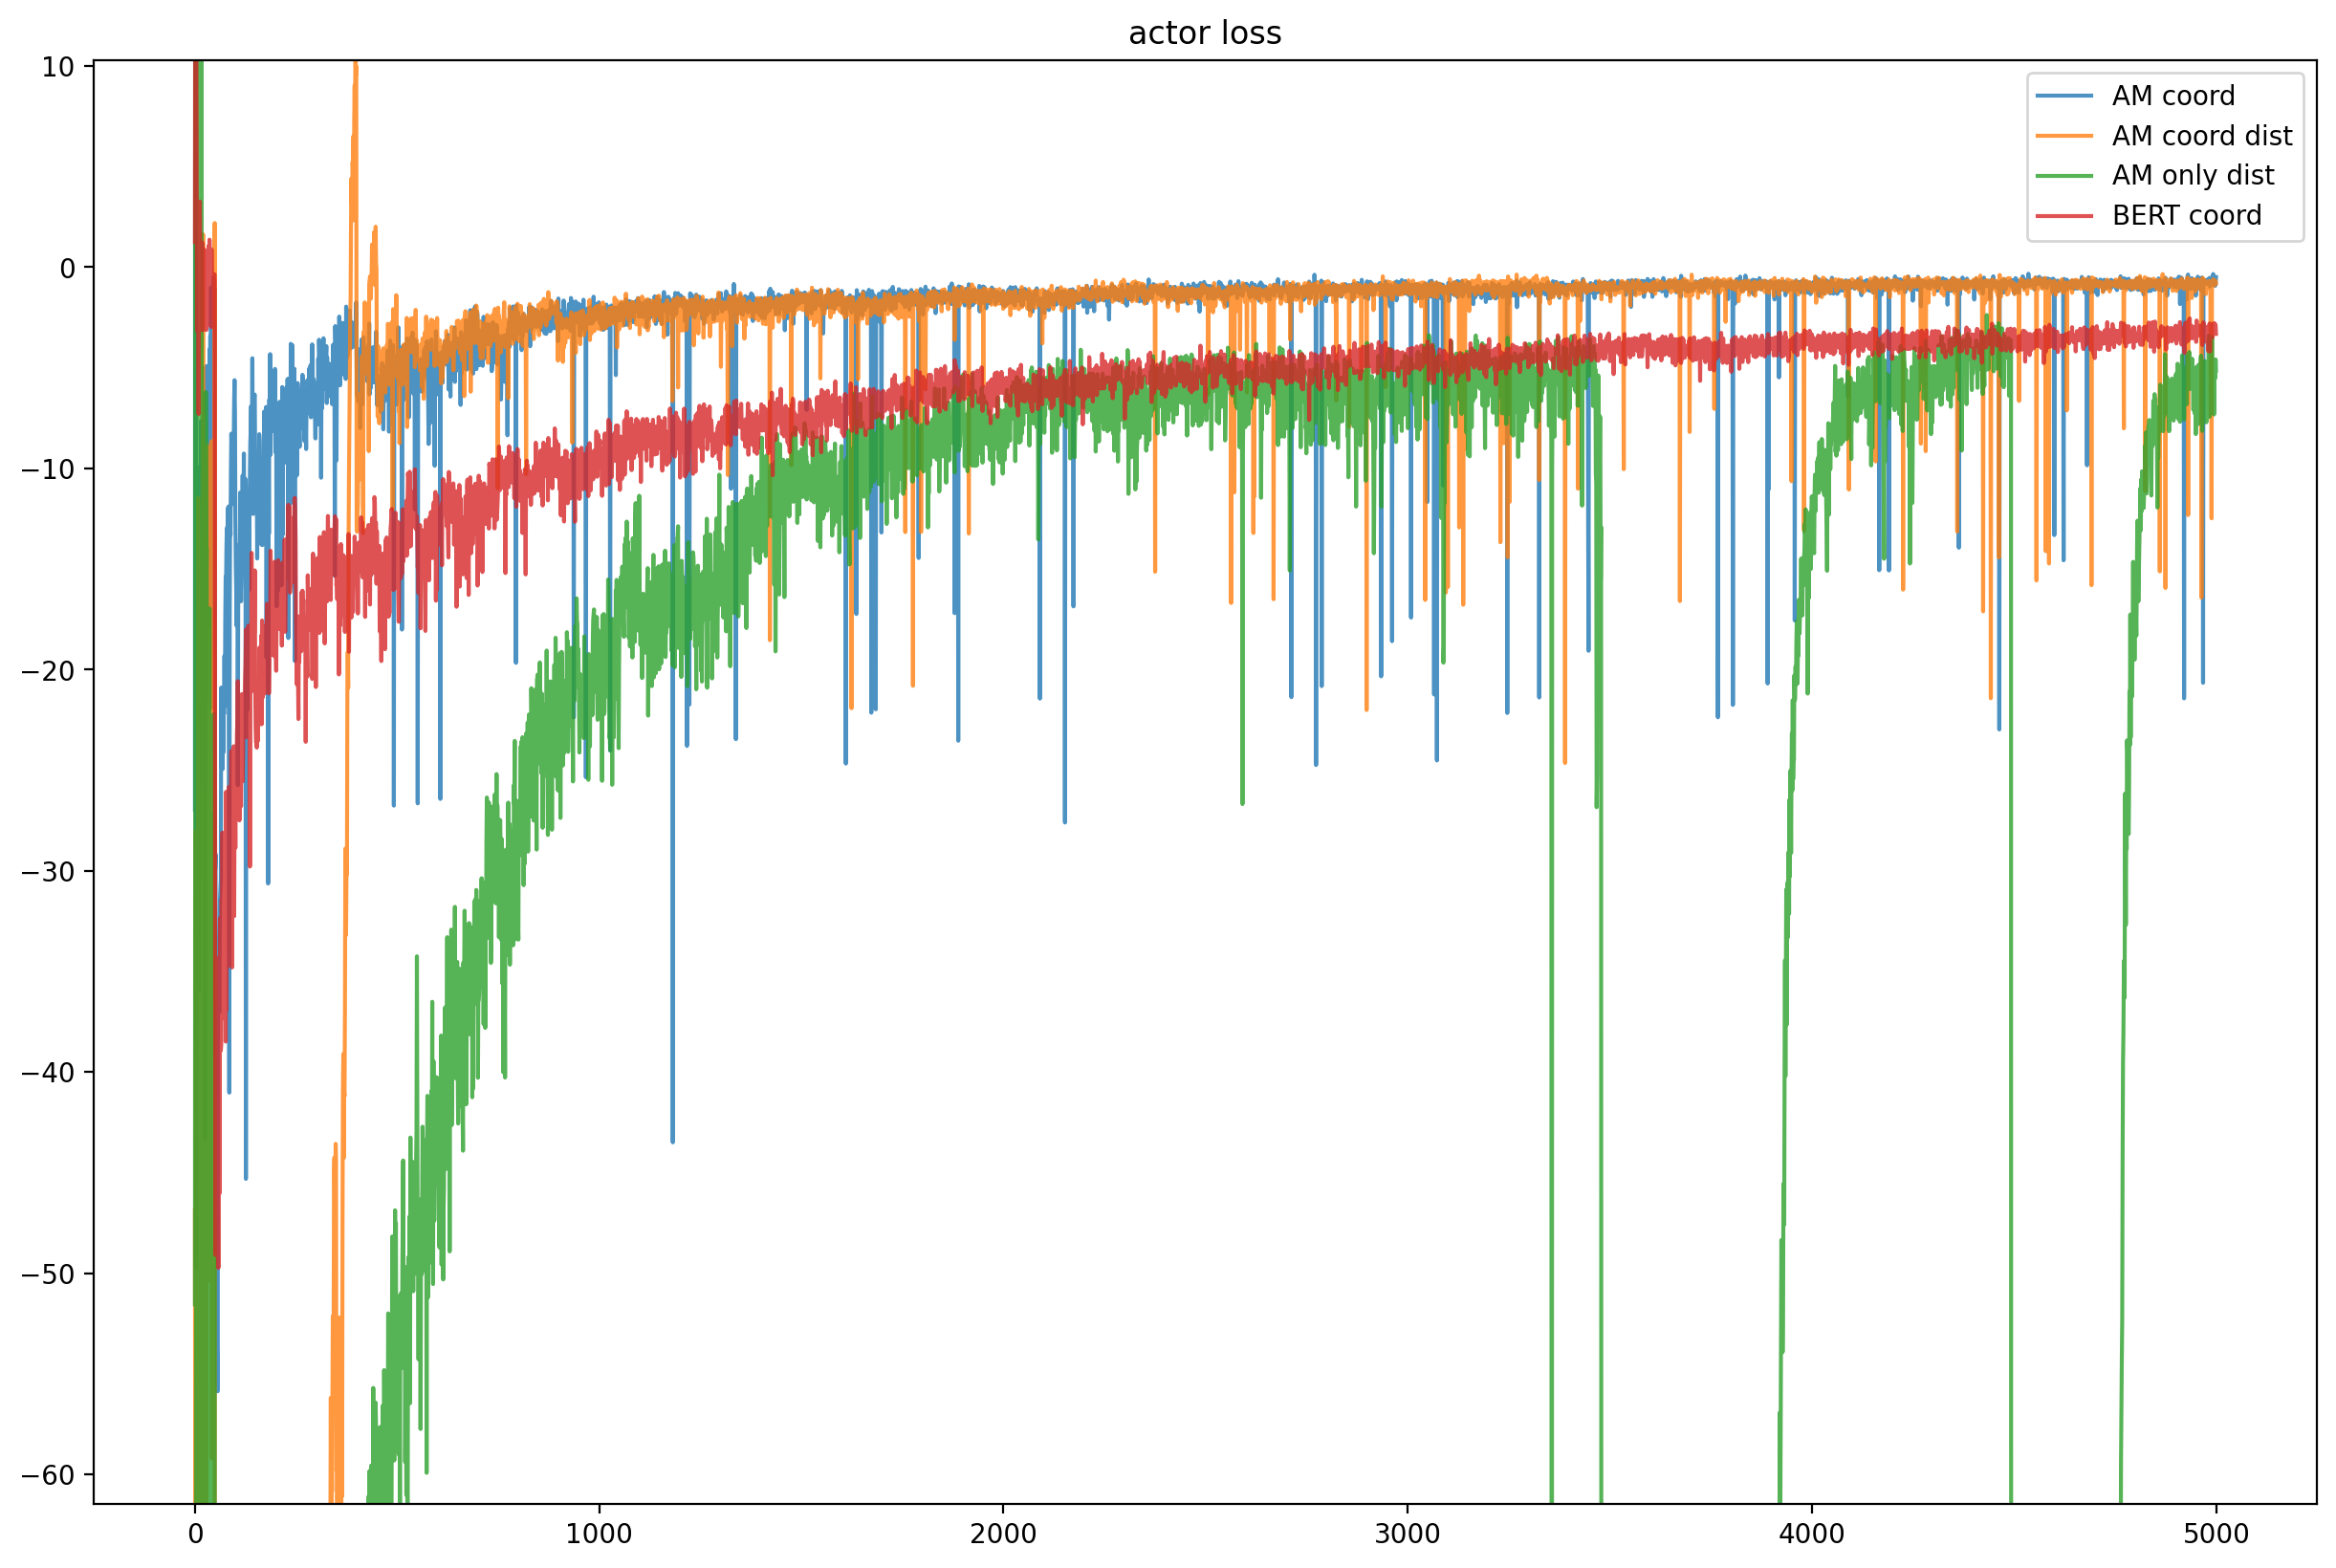

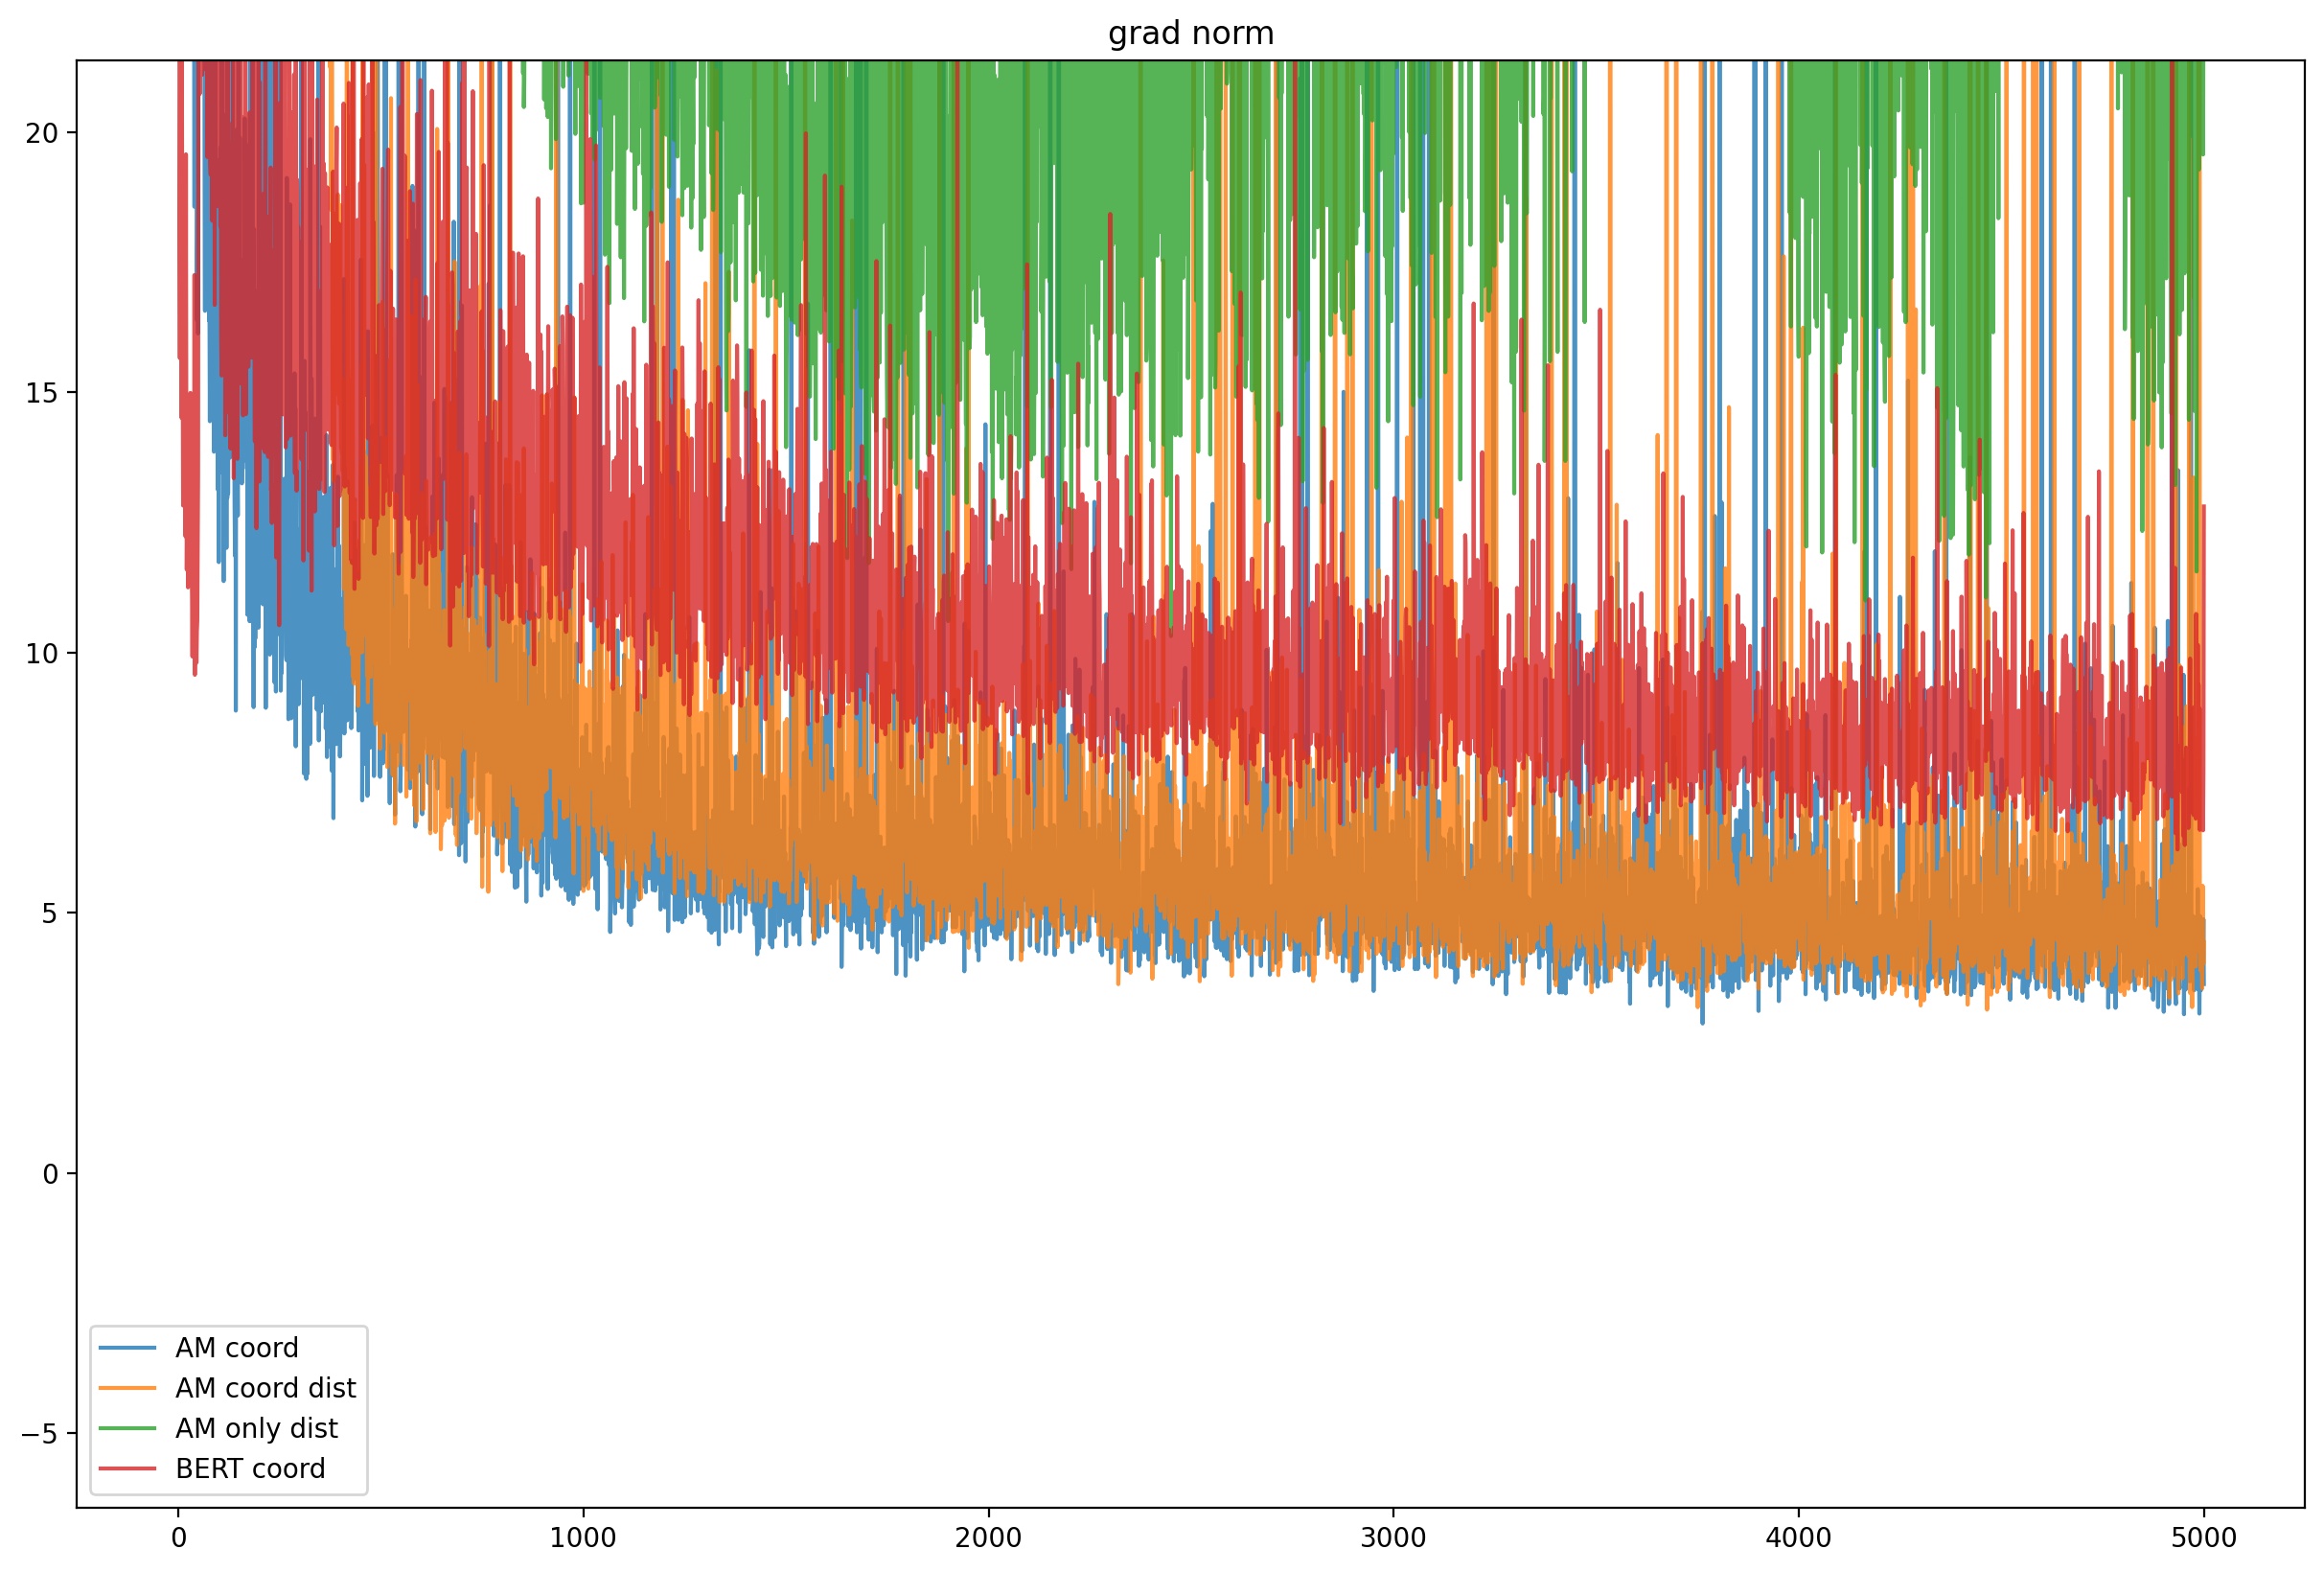

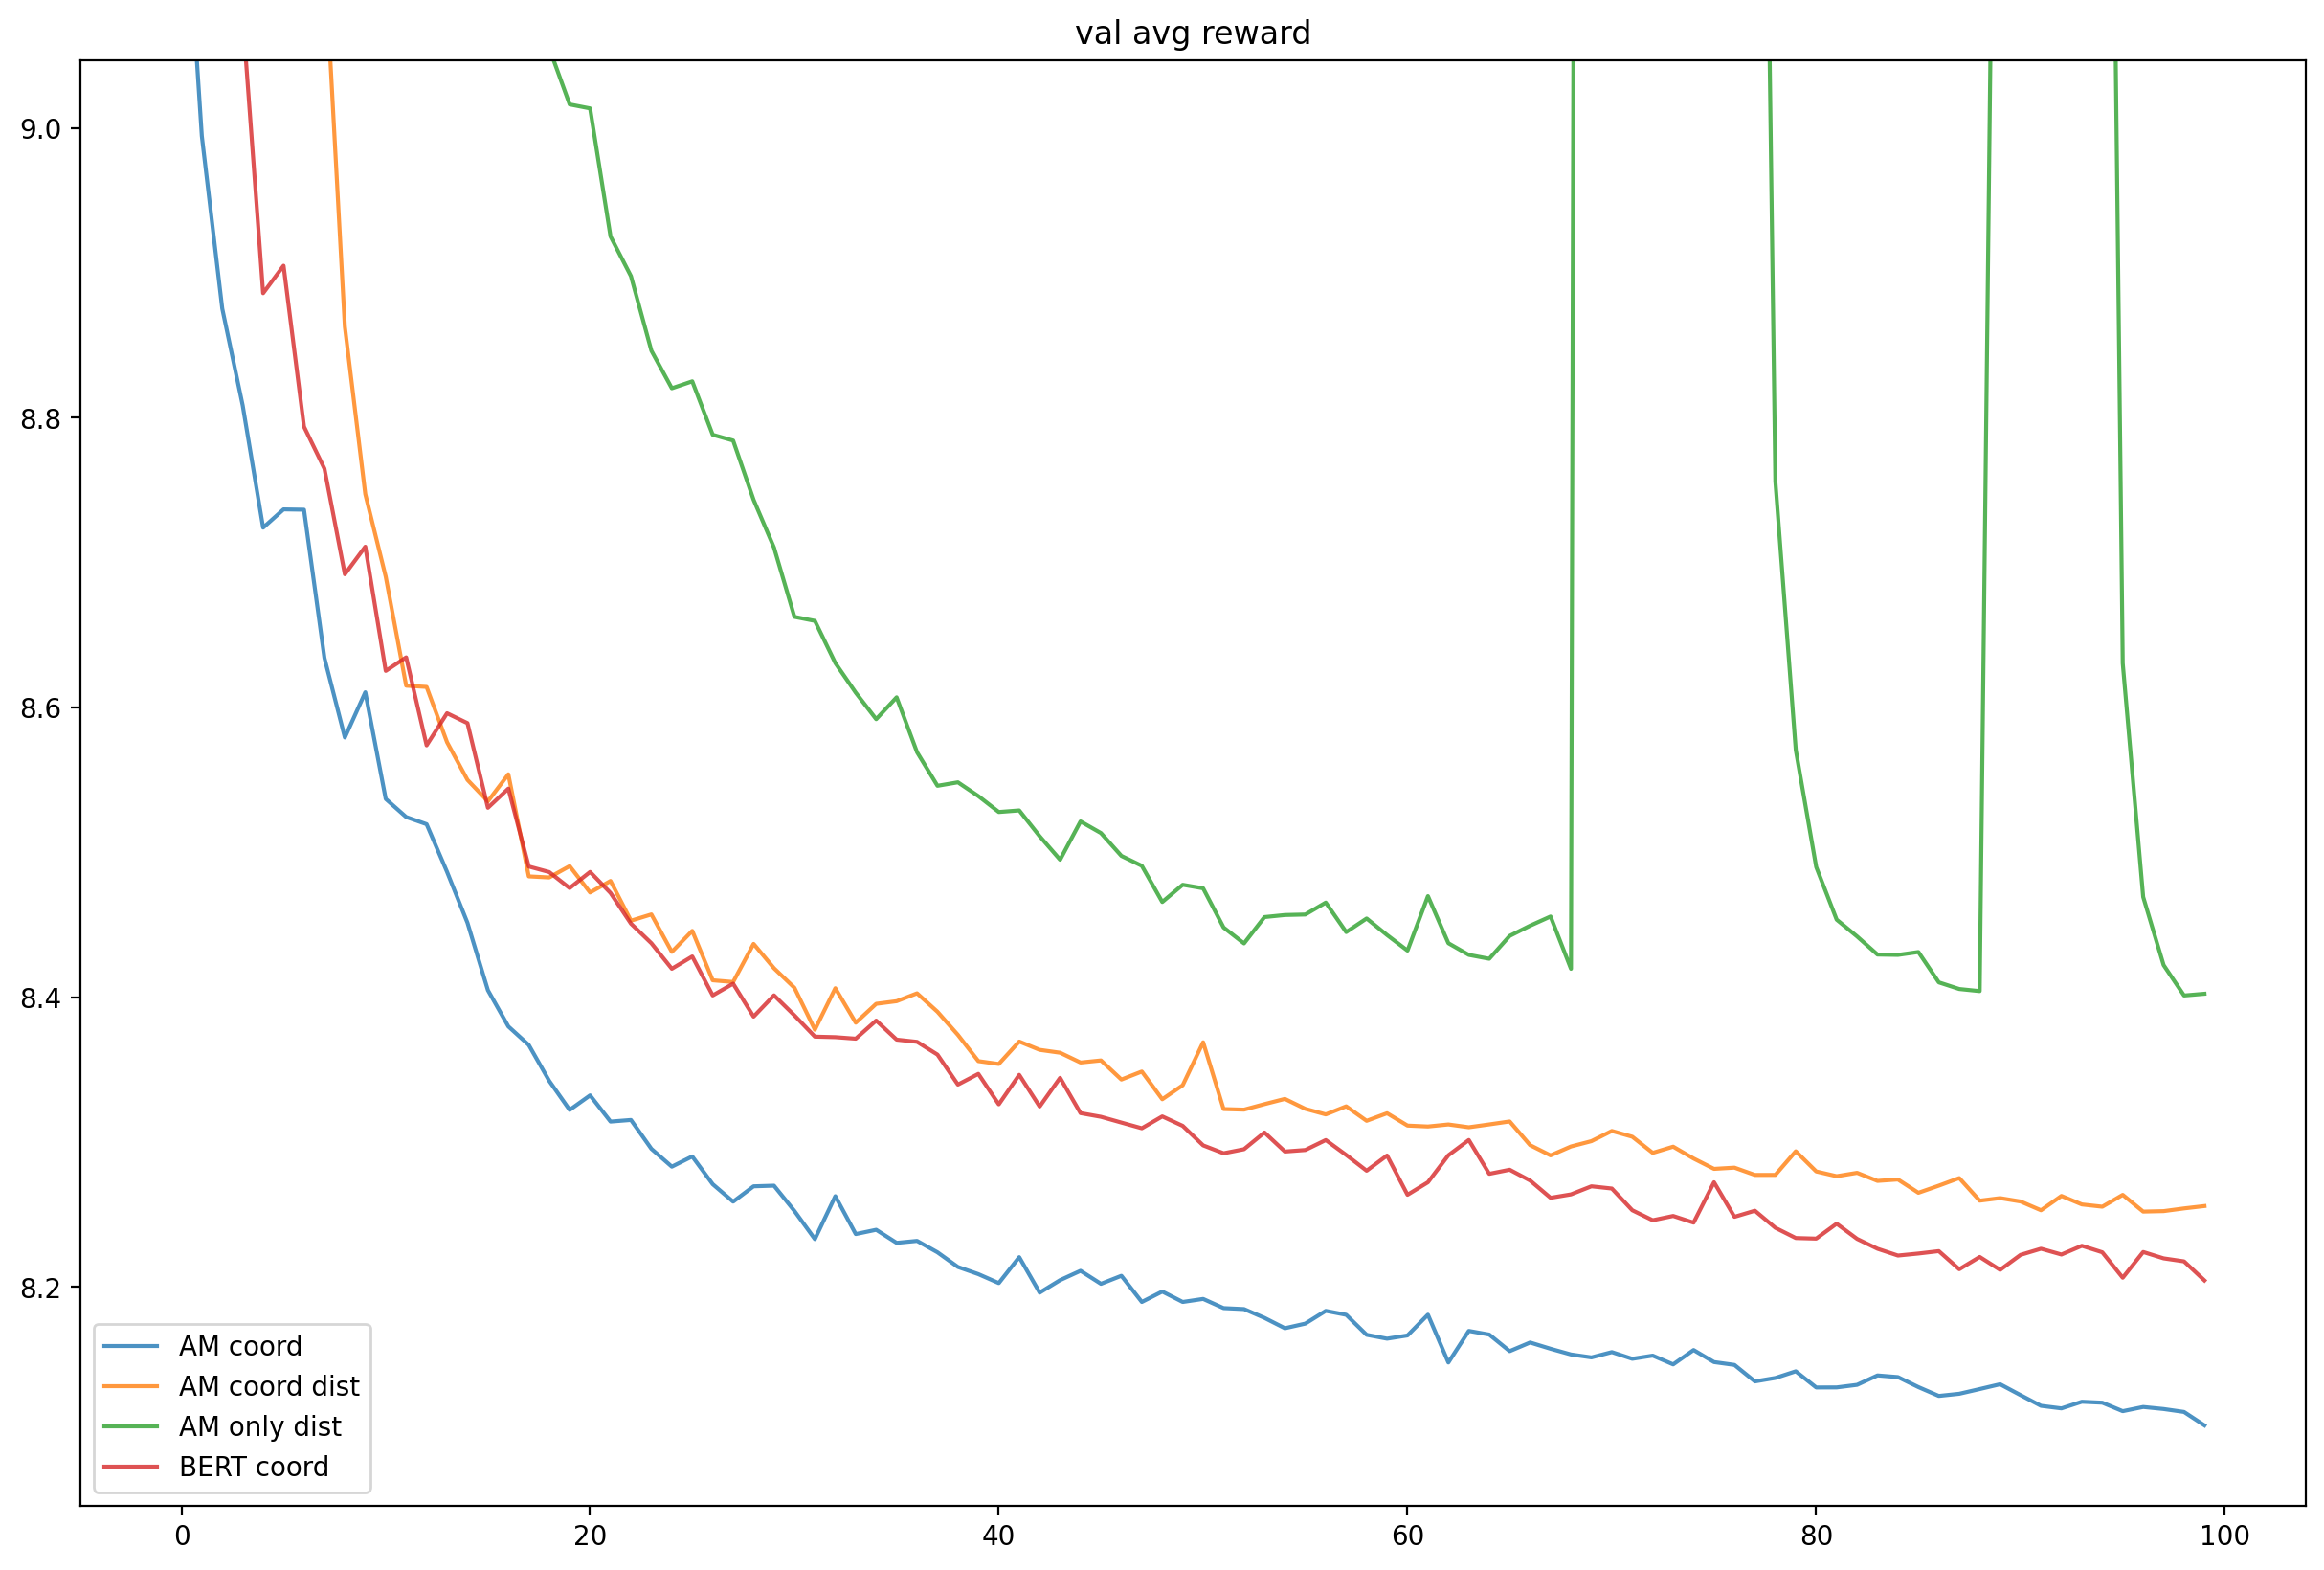

In [9]:
for serie_name in ['avg_cost', 'actor_loss', 'grad_norm', 'val_avg_reward']:

    plt.figure(figsize=figsize, dpi=dpi)

    for i, ea in enumerate(eas):    
        serie = [e.value for e in ea.Scalars(serie_name)]
        plt.plot(serie, label=names[i].replace('_', ' '), alpha=0.8)
        
        # reduce y lim with mean +- 2*std
        mean = np.mean(serie)
        std = np.std(serie)
        plt.ylim(top=mean+3*std)

    plt.legend()
    plt.title(serie_name.replace('_', ' '))
    plt.show()

## Log scale

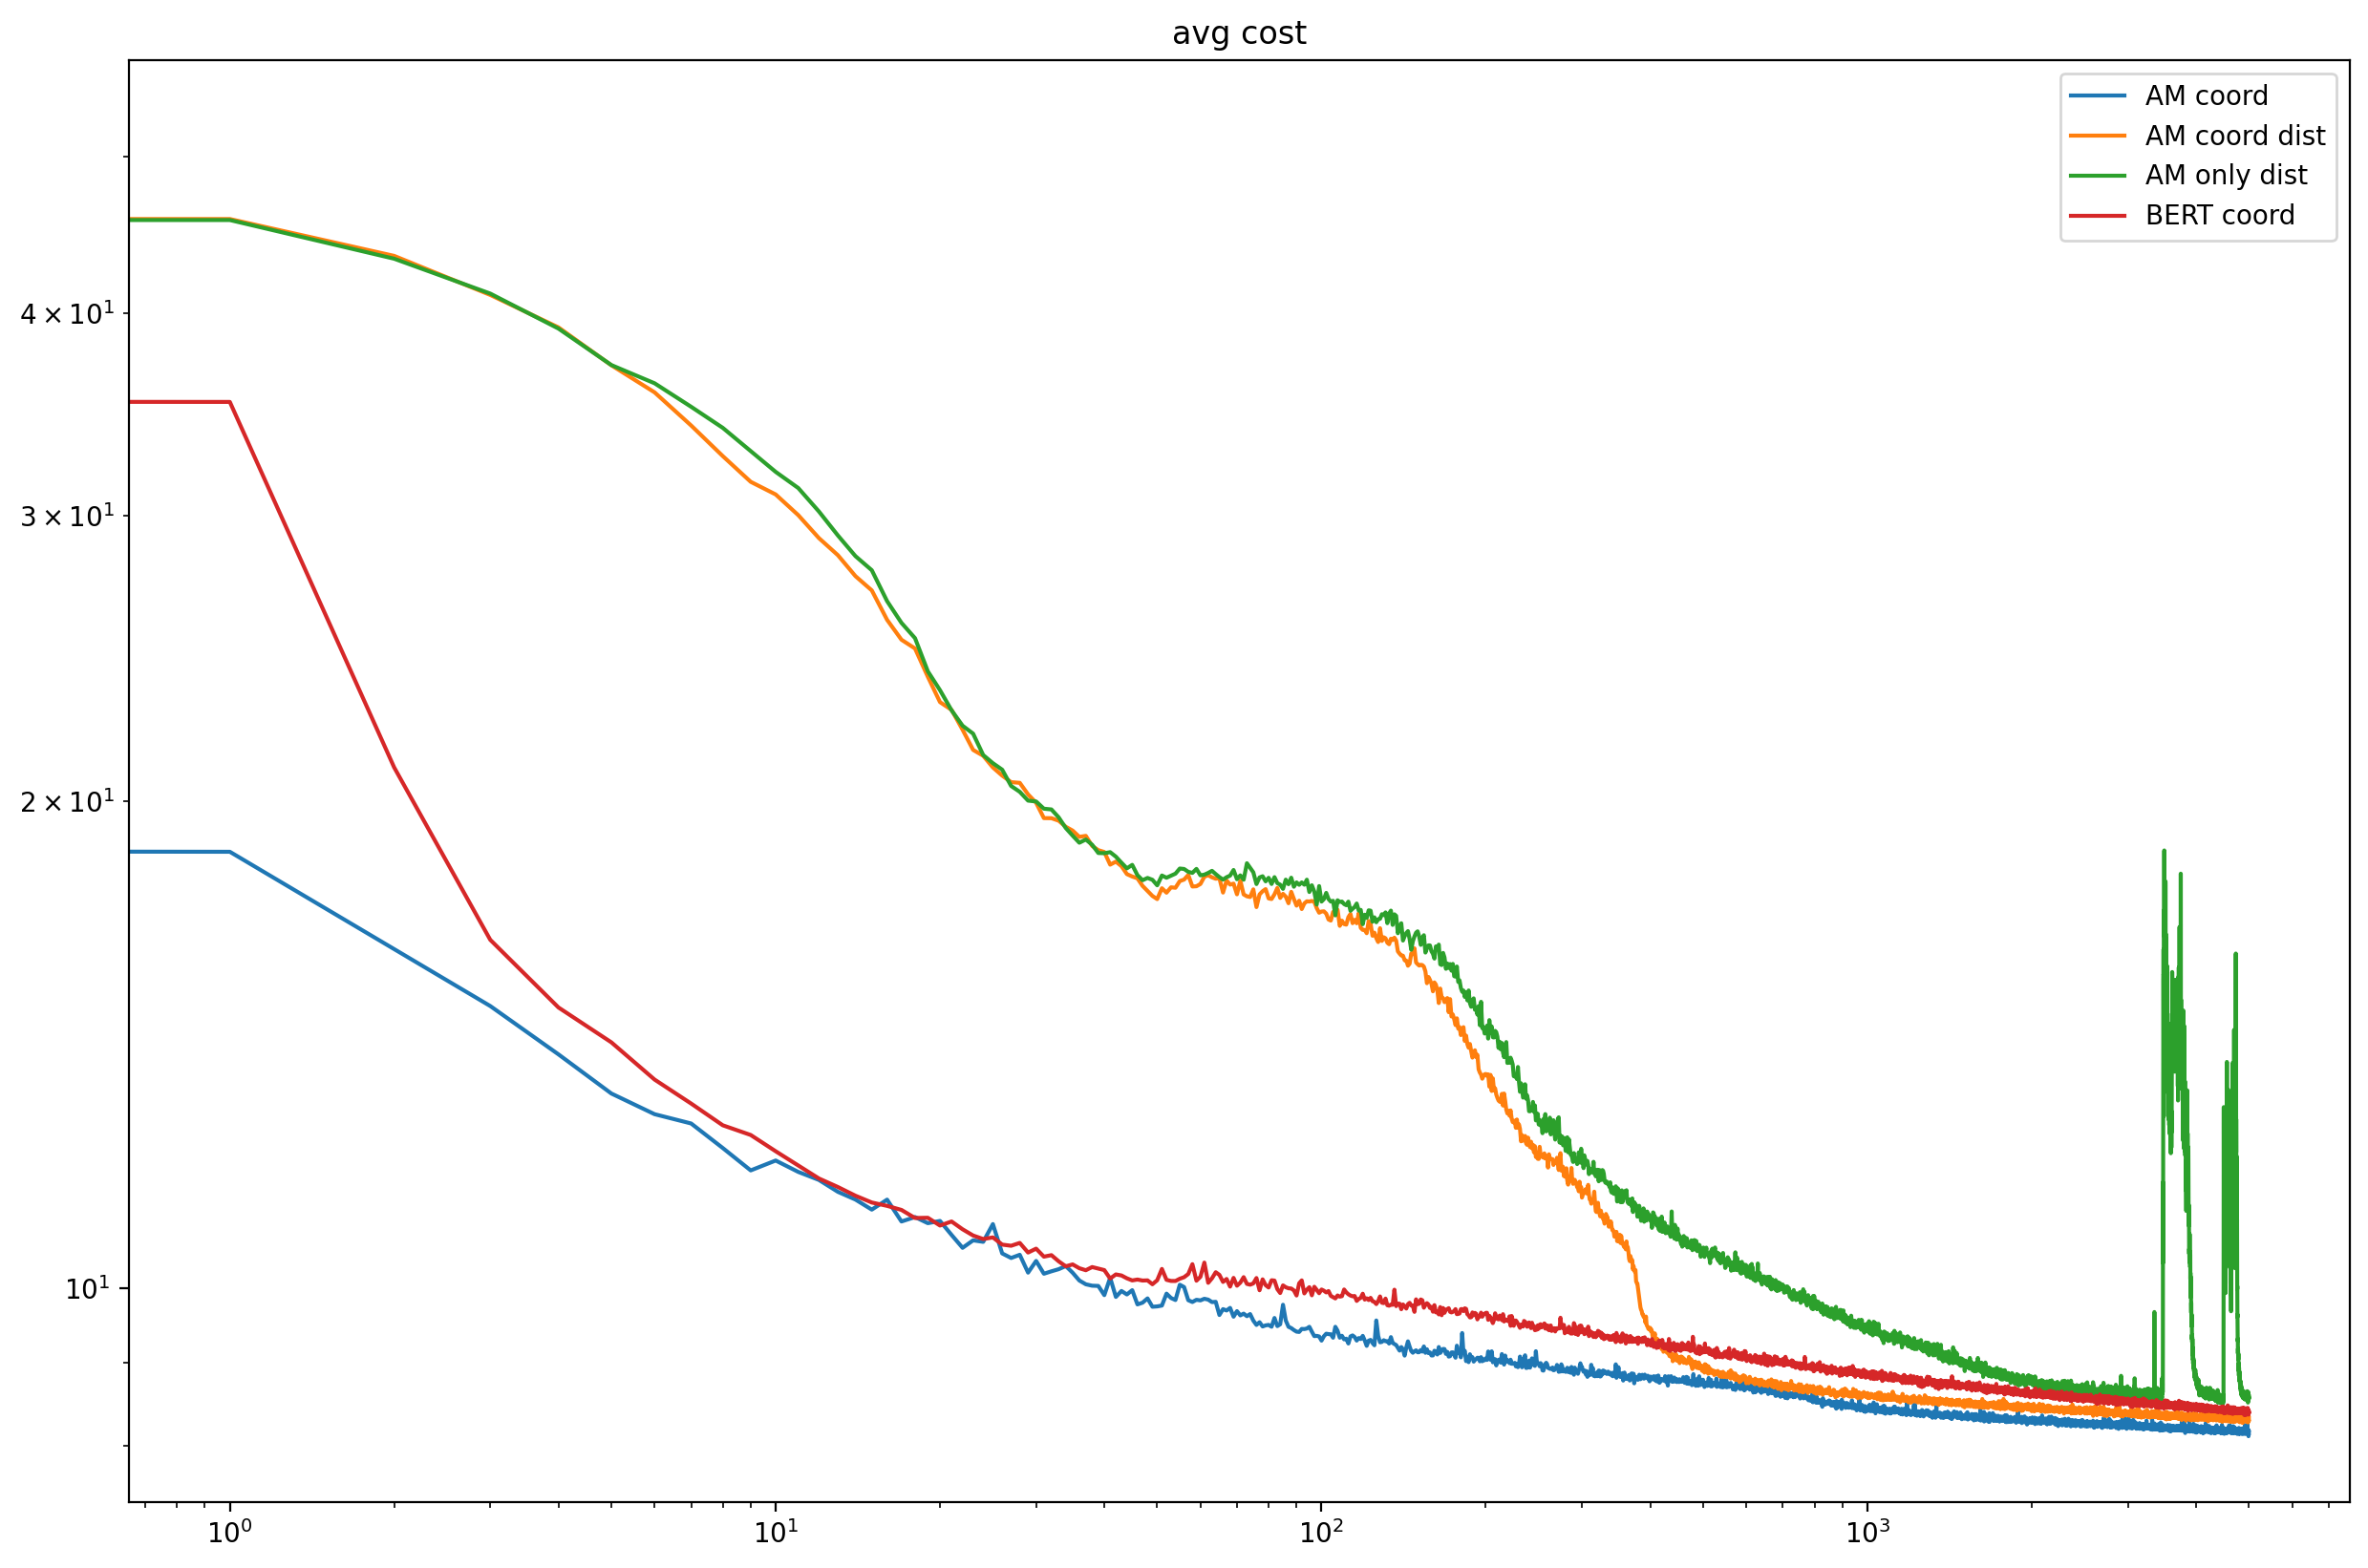

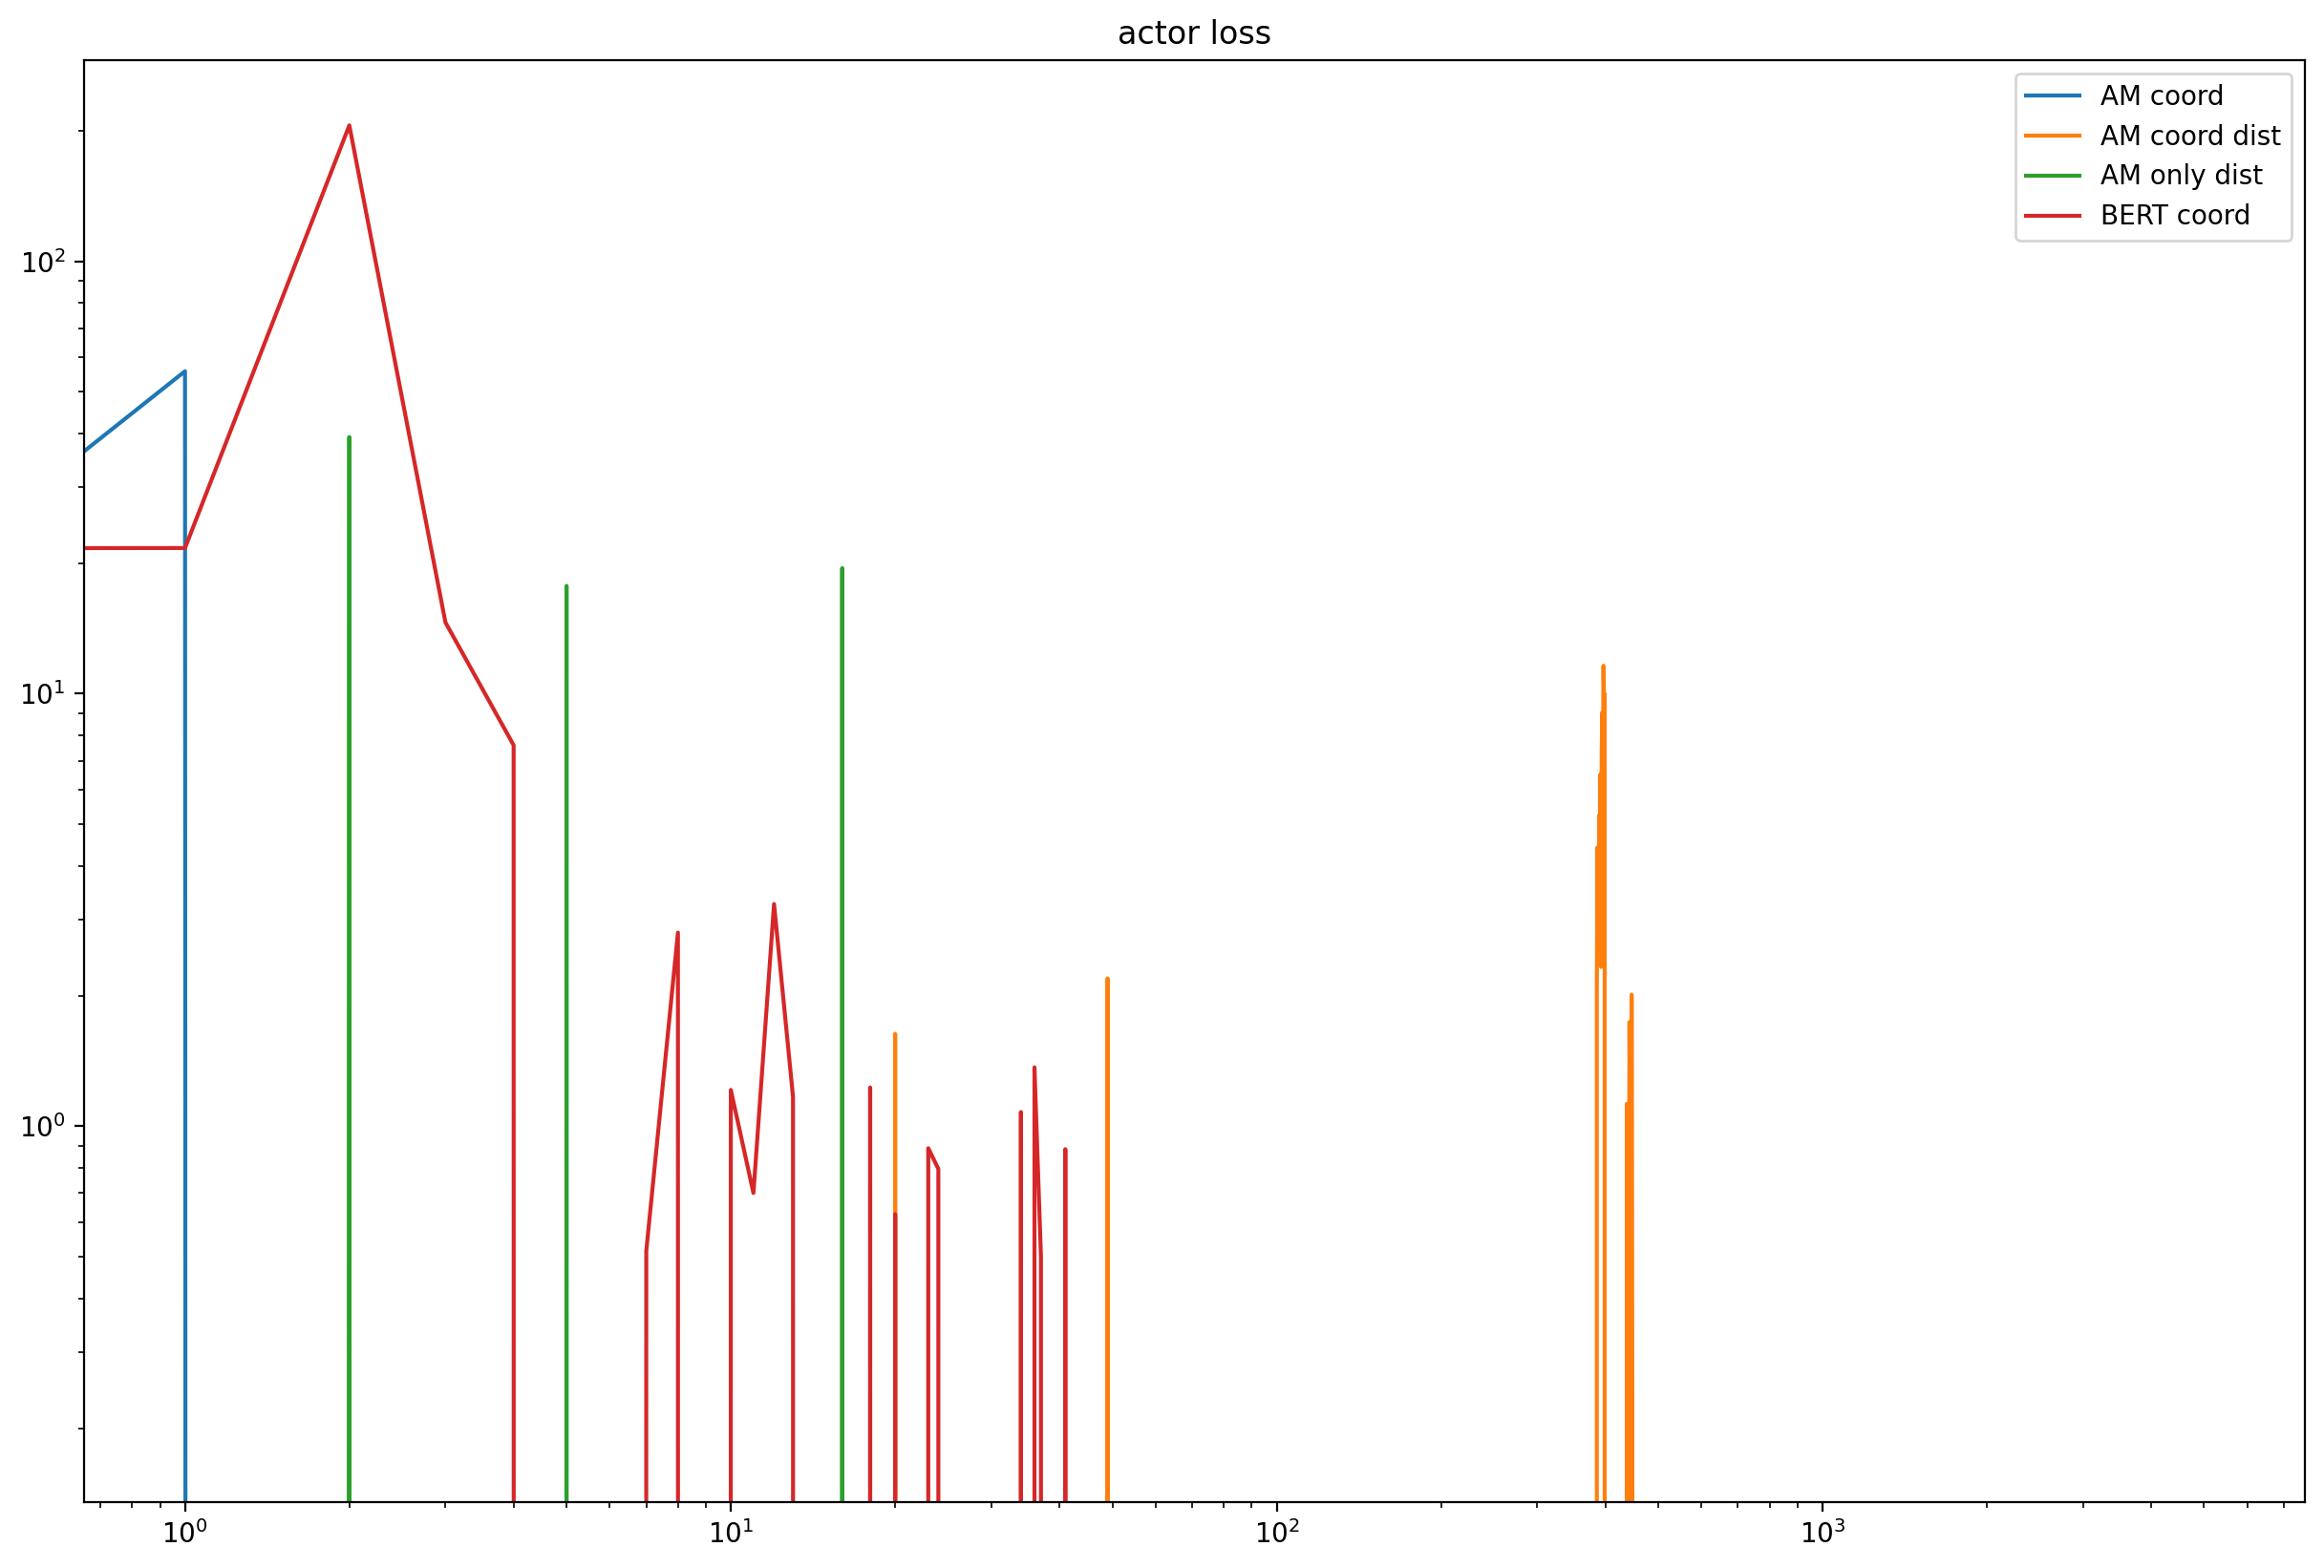

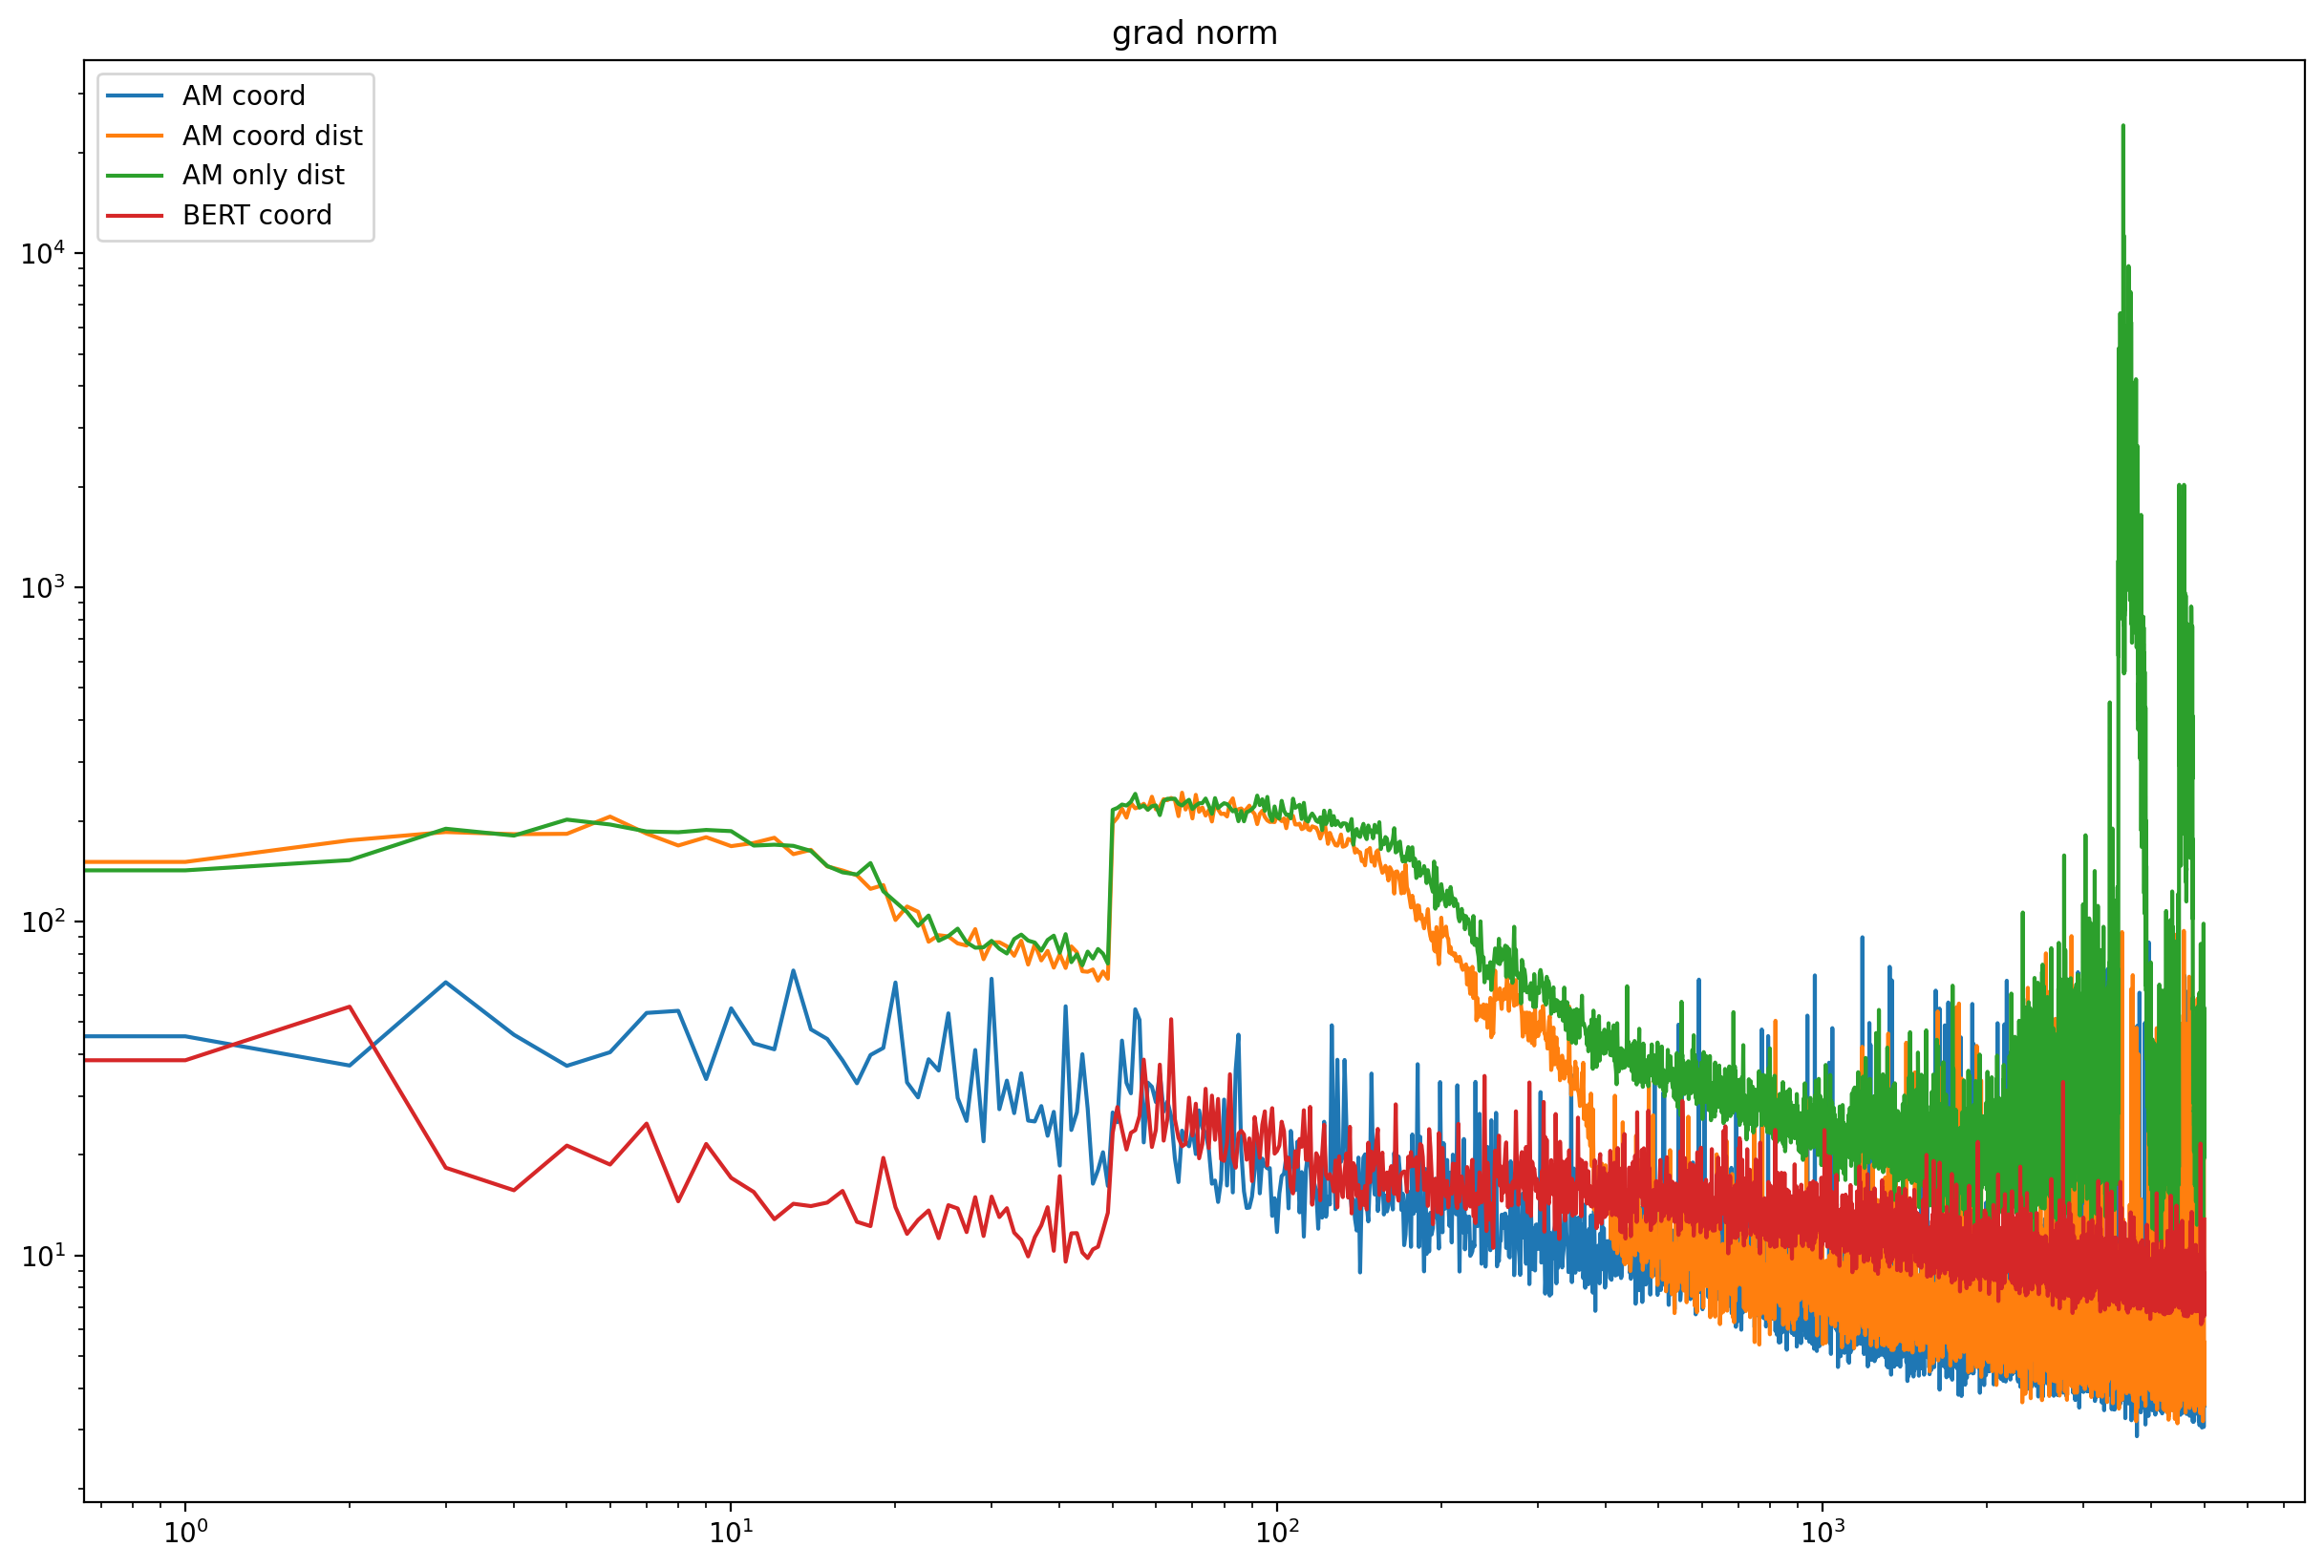

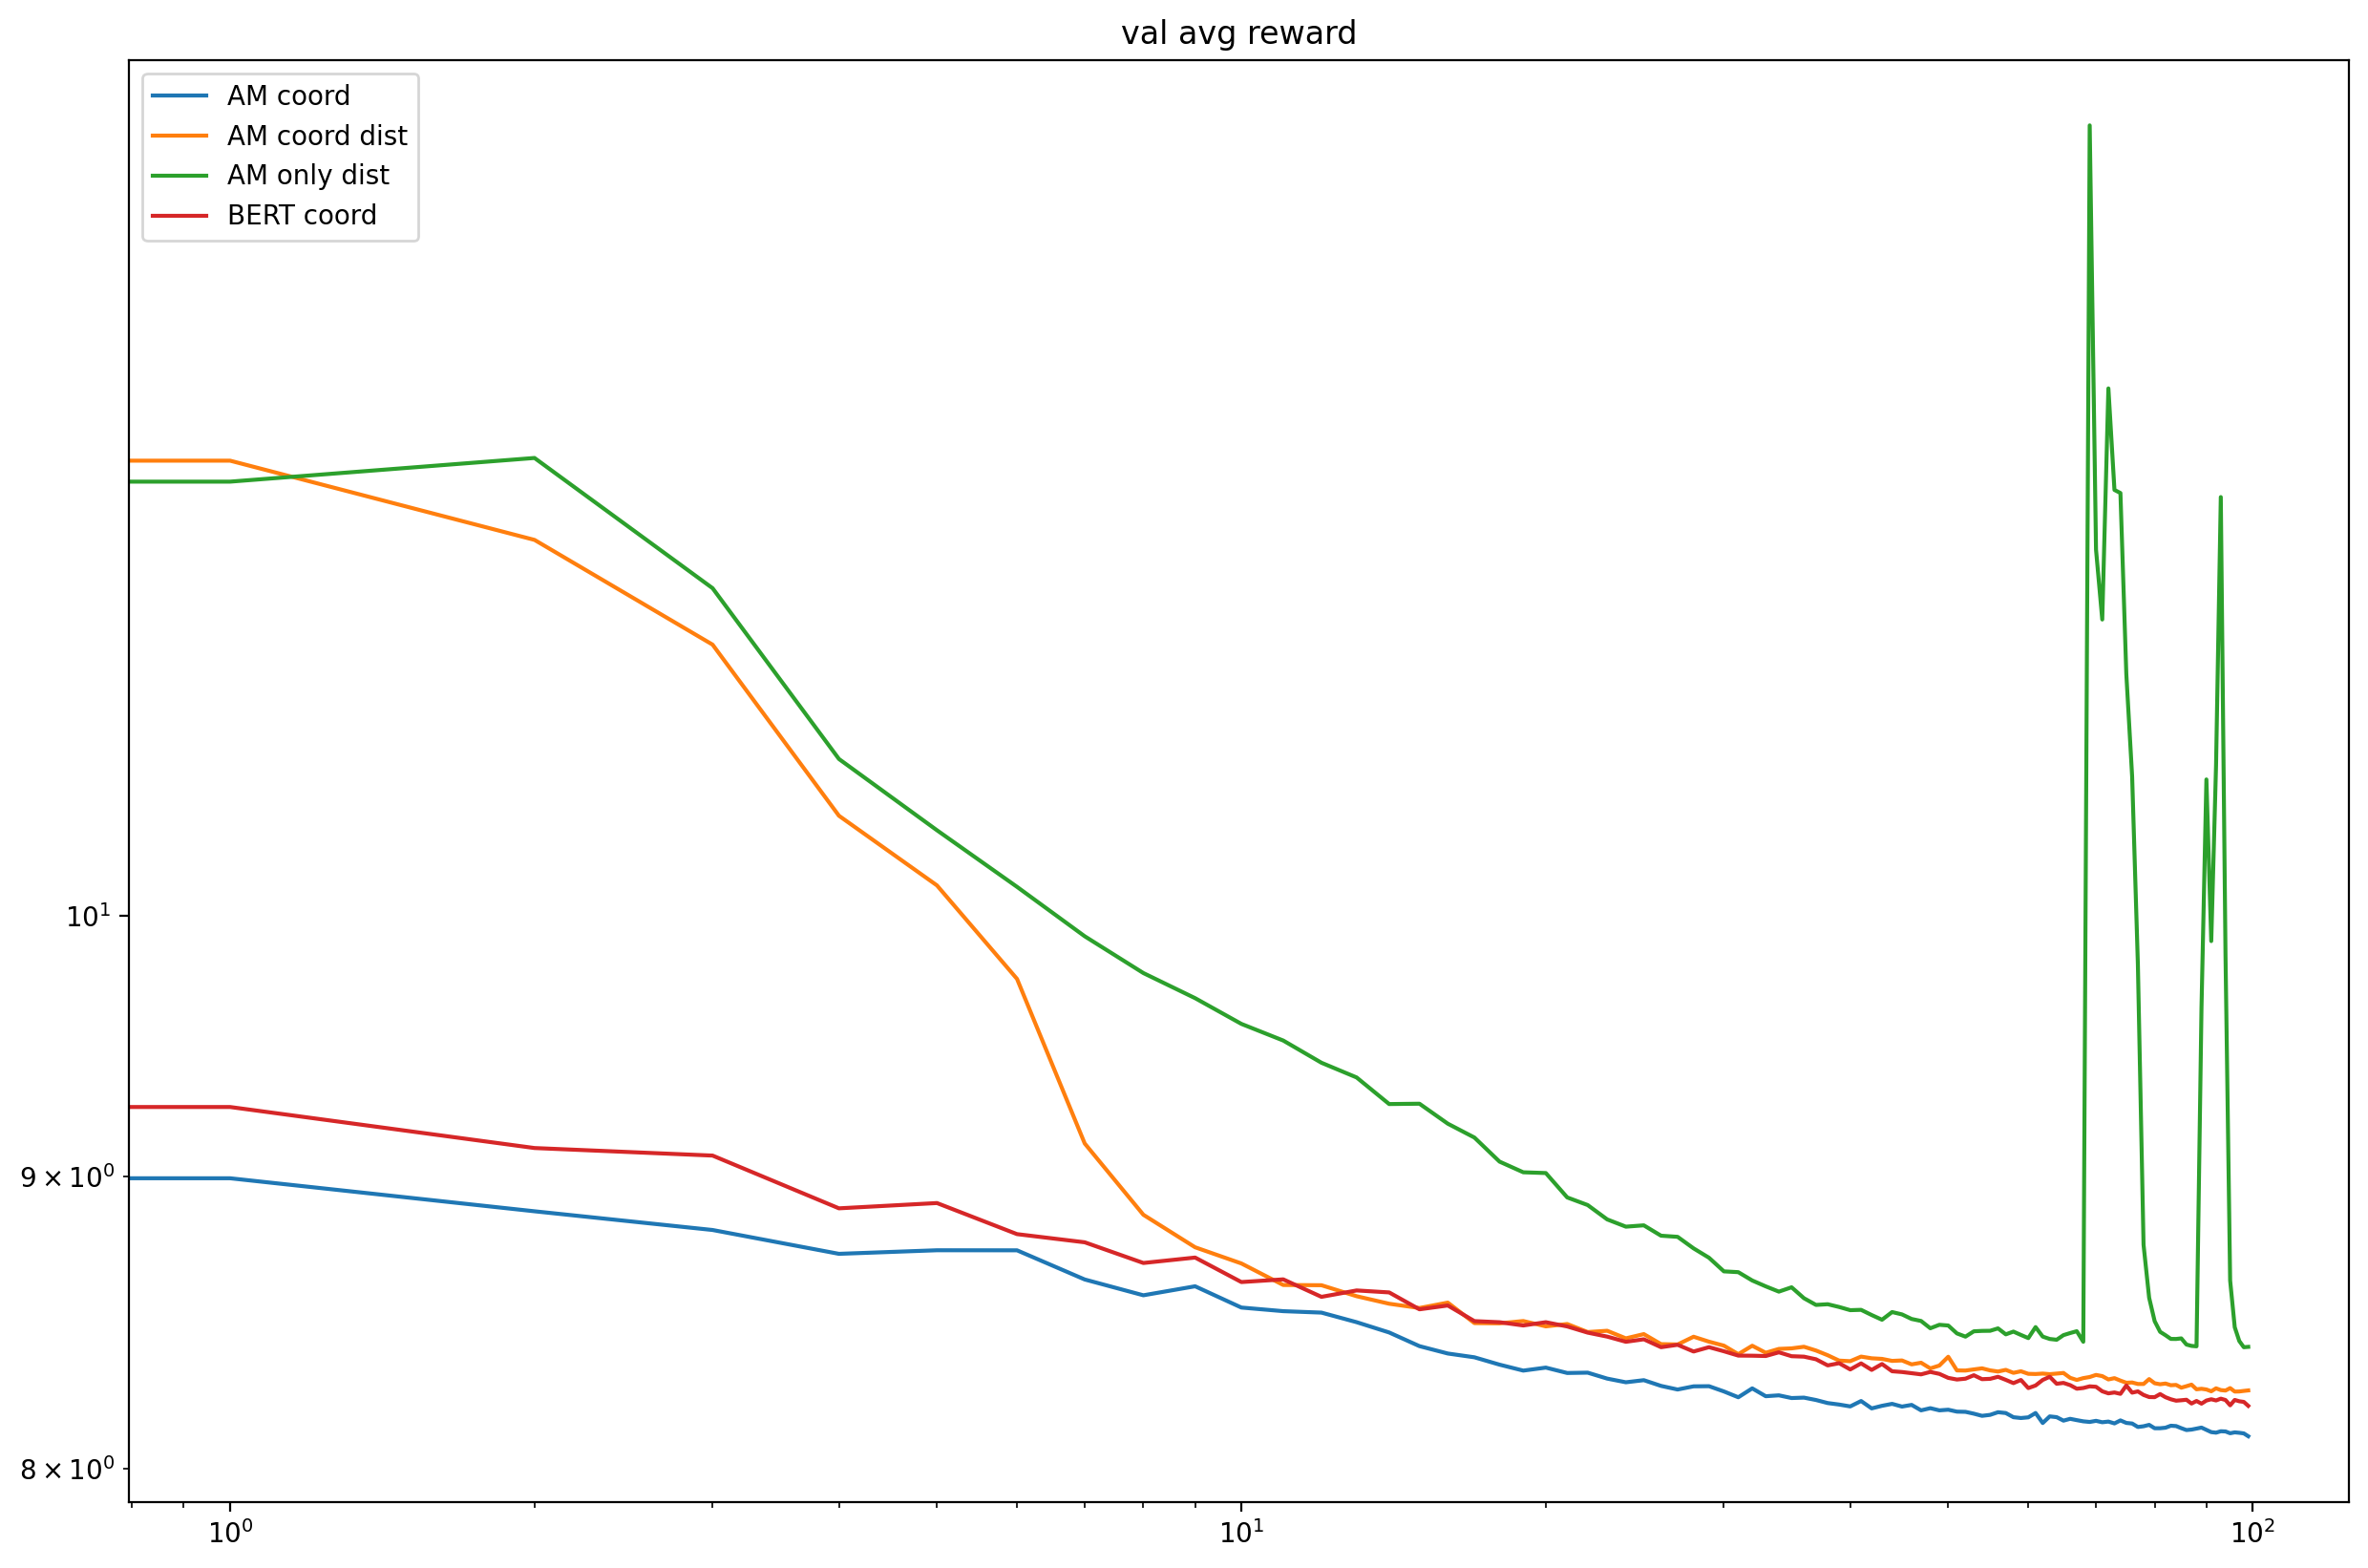

In [10]:
for serie_name in ['avg_cost', 'actor_loss', 'grad_norm', 'val_avg_reward']:

    plt.figure(figsize=figsize, dpi=dpi)
    ax = plt.gca()

    for i, ea in enumerate(eas):    
        serie = [e.value for e in ea.Scalars(serie_name)]
        plt.loglog(serie, label=names[i].replace('_', ' '))

    plt.legend()
    plt.title(serie_name.replace('_', ' '))
    plt.show()
        